In [2]:
# %load notebook_setup.py
#Use %load notebook_setup.py to load these commands at the top of your
#ipython notebook.  Includes running the std_libraries.py file. 

%run std_libraries.py
%load_ext autoreload
%autoreload 2
# %matplotlib 
# plt.ioff()
%matplotlib inline
#matplotlib notebook

what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = otherb
base directory is /home/heineike/github/yeast_esr_expression_analysis
Importing yeast_esr_exp and setting base_dir and data_processing_dir
are you online? Yes/No Yes
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Compare LFC Between Last year and this year for AS +/- NMPP1

In [4]:
#Load DEseq data for AS +/- drug

pkainh_deseq = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_deseq_SC_AS_WT_nmpp1.csv'), index_col=0)
#pkainh_deseq = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_deseq_SC_AS_nmpp1.csv'), index_col=0)

#Load DEseq data from 2017 for AS +/-drug

pkainh_deseq_2017 = pd.read_csv(os.path.normpath(data_processing_dir + '\\20170817_klscpka\\20170817_klscpka_DESEQ_YPD_t40_ASMinvASPlus_SC.csv'), index_col=0)

pkainh_deseq_merged = pkainh_deseq.merge(pkainh_deseq_2017, left_index=True, right_index=True, how = 'outer', suffixes = ('','_2017')) 


#Add column for common names
pkainh_deseq_merged['SC_common_name'] =yeast_esr_exp.SC_common_name_lookup(pkainh_deseq_merged.index)

for column in ['log2FoldChange', 'log2FoldChange_2017']: 
    pkainh_deseq_merged[column] = pkainh_deseq_merged[column].fillna(0.0)

FileNotFoundError: File b'/home/heineike/github/expression_broad_data/expression_data/\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_deseq_SC_AS_WT_nmpp1.csv' does not exist

In [20]:
spec = 'SC'

data = []

xlabel = 'LFC AS -/+ Nmpp1 2017'
ylabel = 'LFC AS -/+ Nmpp1'

trace = pygo.Scatter(
            x = pkainh_deseq_merged['log2FoldChange_2017'], 
            y =  pkainh_deseq_merged['log2FoldChange'],
            text = pkainh_deseq_merged['SC_common_name'],
            mode = 'markers',
            marker = {'opacity': 0.5}, #, 
                      #'color': 'rgba'+str(cmap(NN/10))}, 
            name = xlabel + ' vs ' + ylabel 
        )
        
data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-20, 20],
        "title": xlabel
    },
    yaxis= {
        #"range":[-10, 10],
        "title": ylabel
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename= 'SC_AS_pmNMPP1_2017LFC_V2018')

## Load DEseq data for SCer Rph1/Gis1 delete experiment

In [3]:
#Load DEseq data for SCer Rph1/Gis1 delete experiment

r1g1_deseq = pd.read_csv(os.path.normpath(data_processing_dir + 'kl_sc_PKA_as_m24_r1g1_20181017/20181017_deseq_SC_AS_wtVr1g1.csv'), index_col=0)

#Add column for common names
r1g1_deseq['SC_common_name'] = yeast_esr_exp.SC_common_name_lookup(r1g1_deseq.index)


#Load DEseq data for SCer Msn24/drug interaction contrast
m24_nmpp1_int_deseq = pd.read_csv(os.path.normpath(data_processing_dir + 'kl_sc_PKA_as_m24_r1g1_20181017/20181017_deseq_SC_AS_m24del_nmpp1_interaction.csv'), index_col=0)

#Add column for common names
m24_nmpp1_int_deseq['SC_common_name'] = yeast_esr_exp.SC_common_name_lookup(m24_nmpp1_int_deseq.index)


#Load DEseq data for SCer Msn2/4 delete in WT experiment
m24_deseq = pd.read_csv(os.path.normpath(data_processing_dir + 'kl_sc_PKA_as_m24_r1g1_20181017/20181017_deseq_SC_WT_wtVm24.csv'), index_col=0)

#Add column for common names
m24_deseq['SC_common_name'] = yeast_esr_exp.SC_common_name_lookup(m24_deseq.index)


#Load DEseq data for SCer PKA AS -/+ NMPP1 
pkainh_deseq = pd.read_csv(os.path.normpath(data_processing_dir + 'kl_sc_PKA_as_m24_r1g1_20181017/20181017_deseq_SC_AS_WT_nmpp1.csv'), index_col=0)
pkainh_deseq['SC_common_name'] = yeast_esr_exp.SC_common_name_lookup(pkainh_deseq.index)


#Load DEseq data for SCer PKA AS Msn2/4 delete -/+ NMPP1 
pkainh_m24del_deseq = pd.read_csv(os.path.normpath(data_processing_dir + 'kl_sc_PKA_as_m24_r1g1_20181017/20181017_deseq_SC_AS_M24_nmpp1.csv'), index_col=0)
pkainh_m24del_deseq['SC_common_name'] = yeast_esr_exp.SC_common_name_lookup(pkainh_m24del_deseq.index)


coords = {}

In [4]:
#Load Msn2/4 deletion / PKA inhibition groups
spec = 'SC'
fname = os.path.normpath(data_processing_dir + 'kl_sc_PKA_as_m24_r1g1_20181017/20181203_r1g1_m24_pka_targets_' + spec + '.pkl')
with open(fname, 'rb') as file:
    [target_sets, coords] = pickle.load(file)
    
#Load GOI ohnolog data (this is defined later in this script)

fname = data_processing_dir + os.sep + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/gois_20190814.pkl')

with open(fname, 'rb') as file:
    [ohnologs_goi,ohnologs_expression_sorted,goi_criteria] = pickle.load(file)


In [3]:
#Make Average rlog data Only need to do once

# #Load Rlog data and metadata
# rlog_all = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_rlog_all_SC.csv'), index_col=0)
# metadata_SC = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_metadata_deseq_SC.csv'), index_col=0)
# #metadata_SC_orig = metadata_SC = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_metadata_deseq_SC_orig.csv'), index_col=0)

# #remove biological replicates
# metadata_SC_noBR = metadata_SC[metadata_SC['replicate']!='BR'].copy()

# #make a label that represents background mutation, deletion, and presence of drug
# metadata_SC_noBR['pka_AS_mut__tf_del__NMPP1'] = metadata_SC['pka_AS_mut'] + '_' + metadata_SC['tf_del'] + '_' + metadata_SC['NMPP1'] 

# metadata_SC_noBR['I7 index str'] = [str(ind) for ind in metadata_SC_noBR.index]
# metadata_SC_noBR.set_index('I7 index str', inplace=True)

# #group samples by mutation, deletion and presence of drug and take mean and variance.  Save as a .csv
# rlog_data_metadata = metadata_SC_noBR.loc[:,['pka_AS_mut__tf_del__NMPP1']].merge(rlog_all.T,how = 'left', left_index = True, right_index = True)
# rlog_data_grouped = rlog_data_metadata.groupby(by=['pka_AS_mut__tf_del__NMPP1'])
# rlog_data_grouped_mean = rlog_data_grouped.agg('mean').T
# rlog_data_grouped_var = rlog_data_grouped.agg('var').T
# rlog_data_mean_var = rlog_data_grouped_mean.merge(rlog_data_grouped_var, how = 'inner', left_index = True, right_index = True, suffixes=['_mean', '_var'])

# rlog_data_mean_var['SC_common_name'] = yeast_esr_exp.SC_common_name_lookup(rlog_data_mean_var.index)
# rlog_data_mean_var.to_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_rlog_mean_SC.csv' ))


In [5]:
#load average rlog data
rlog_data_mean_var = pd.read_csv(os.path.normpath(data_processing_dir + 'kl_sc_PKA_as_m24_r1g1_20181017/20181017_rlog_mean_SC.csv' ),index_col=0)


## Get set of genes effected by PKA

In [5]:
x_data = pkainh_deseq['log2FoldChange']
y_data =  -np.log10(pkainh_deseq['pvalue'])

#To Call PKA AS -/+ activated genes make a line and a low pValue cutoff

x1,y1 = (2.0,15)
x2,y2 = (2.5,0.0)
ymin = 1.5

#save the coordinates in a dictionary
coords['pkainh_act'] = [(x1,y1),(x2,y2),ymin]

pkainh_act_genes = pkainh_deseq[(y_data > y2- (y2-y1)/(x2-x1)*(x2-x_data)) & (y_data>ymin)]

print('pkainh_act genes: ' + str(len(pkainh_act_genes)))

#To Call PKA AS -/+ repressed genes make a line and a low pValue cutoff

x1,y1 = (-2.5,0.0)
x2,y2 = (-2.0,15)
ymin = 1.5

#save the coordinates in a dictionary
coords['pkainh_rep'] = [(x1,y1),(x2,y2),ymin]

pkainh_rep_genes = pkainh_deseq[(y_data > y2- (y2-y1)/(x2-x1)*(x2-x_data)) & (y_data>ymin)]

print('pkainh_rep genes: ' + str(len(pkainh_rep_genes)))


pkainh_act genes: 509
pkainh_rep genes: 697


In [29]:
#Plot Deseq LFC v.s. pValue for AS -/+ drug
hover_text = pkainh_deseq['SC_common_name']

lines = {}
for geneset in ['act', 'rep']: 
    
    lines[geneset + ' threshold'] = coords['pkainh_' + geneset][0:2]
    
    yminline_p1, yminline_p2 = expression_plots.pval_min_line(coords['pkainh_' + geneset][0:2], coords['pkainh_' + geneset][2], x_data)

    lines[geneset + ' pval min'] = [yminline_p1, yminline_p2] 



fig = expression_plots.lfc_padj_plot_with_lines(x_data,y_data,hover_text,lines)

py.iplot(fig, filename='RNAseq2018_SC_PKA_AS_pmNMPP1')

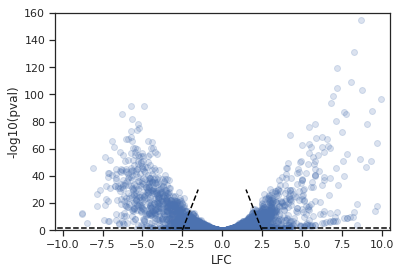

In [34]:
#Plot Deseq LFC v.s. pValue for AS -/+ drug

fig, ax = plt.subplots()

lines = {}

xmax = 10.5
xmin = -xmax
ymin = 0
ymax = 160

# for geneset in ['act', 'rep']: 
    
#     lines[geneset + ' threshold'] = coords['pkainh_' + geneset][0:2]
    
#     yminline_p1, yminline_p2 = expression_plots.pval_min_line(coords['pkainh_' + geneset][0:2], coords['pkainh_' + geneset][2], x_data)

#     lines[geneset + ' pval min'] = [yminline_p1, yminline_p2] 

#Lines that define my genes of interest
#(x1, y1), (x2,y2)
# line_ext = 0.5

slope_act = (coords['pkainh_act'][0][1]-coords['pkainh_act'][1][1])/(coords['pkainh_act'][0][0]-coords['pkainh_act'][1][0])
slope_rep = (coords['pkainh_rep'][0][1]-coords['pkainh_rep'][1][1])/(coords['pkainh_rep'][0][0]-coords['pkainh_rep'][1][0])

line_ext = 0.5
lines = {'act_LFC' : [coords['pkainh_act'][1], np.array(coords['pkainh_act'][0]) - np.array((line_ext, slope_act*line_ext))],
         'act_pval': [(coords['pkainh_act'][1][0],coords['pkainh_act'][2]),(xmax,coords['pkainh_act'][2])],
         'rep_LFC' : [coords['pkainh_rep'][0], np.array(coords['pkainh_rep'][1]) + np.array((line_ext, slope_rep*line_ext))],
         'rep_pval': [(coords['pkainh_rep'][1][0],coords['pkainh_rep'][2]),(xmin,coords['pkainh_rep'][2])]
        }


for line_name, ((x1,y1),(x2,y2)) in lines.items():
    x = np.array([x1,x2])
    y = np.array([y1,y2])
    ax.plot(x,y,'--', color='black')


ax.scatter(x_data,y_data, alpha=0.2)
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
ax.set_xlabel('LFC')
ax.set_ylabel('-log10(pval)')
#save figure
#py.iplot(fig, filename='RNAseq2018_SC_PKA_AS_pmNMPP1')

fig.savefig(os.path.normpath(figsave_dir + "SC_PKA_targets.svg")) 

In [25]:
[coords['pkainh_rep'][1], np.array(coords['pkainh_rep'][0]) - np.array((line_ext, slope_rep*line_ext))]

[(-2.0, 15), array([ -3., -15.])]

In [27]:
[coords['pkainh_act'][1], np.array(coords['pkainh_act'][0]) - np.array((line_ext, slope_act*line_ext))]

[(2.5, 0.0), array([  1.5,  30. ])]

Figure [supp S1]: LFC v.s. -log10(p_value) for Targets of activation and repression in {{spec}} were defined as all genes that fell above the line defined by the points {{x1,y1}} and {{x1,y2}}, and for which -log10(pvalue)>{{ymin}}. 

Later these genes are saved in this file: 
fname = data_processing_dir + 'kl_sc_PKA_as_m24_r1g1_20181017/20181203_r1g1_m24_pka_targets_' + spec + '.pkl'


In [14]:
#Load PKA target sets (also includes targets from later analysis)
fname = os.path.normpath(data_processing_dir + 'kl_sc_PKA_as_m24_r1g1_20181017/20181203_r1g1_m24_pka_targets_' + spec + '.pkl')

with open(fname, 'rb') as file:
    target_sets, coords = pickle.load(file)

### Load Go term data (prior to scatter plots) 

In [3]:
#Load Go term data
GO_aspect = 'P'
go_slims_aspect, go_term_list = yeast_esr_exp.load_goslim_data(GO_aspect, go_slim_fname = 'go_slim_mapping_20181204.tab')


## Define Differentially expressed paralogs


In [9]:
#Load Ortholog data 
#NOte: this ohnolog data is saved so could just load it directly - see below: 
#Load ohnologs: 
# fname = data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/gois_20181205.pkl')
# with open(fname, 'rb') as file:
#     [ohnologs_goi,ohnologs_expression_sorted,goi_criteria] = pickle.load(file)

ohnologs = pd.read_csv(data_processing_dir + os.path.normpath("ortholog_files_YGOB/ohnologs.csv"), index_col=0)
ohnologs.set_index('Ancestor', inplace=True)
ohnologs.rename(columns={"Gene 1": "genename_gene1", "Gene 2": "genename_gene2"}, inplace=True)

print('Total number of Ohnologs: ' + str(len(ohnologs)))

#build a dataframe that has all SC paralogs paired up and sorted by log2FoldChange

#Load DEseq data for SCer PKA AS -/+ NMPP1 
pkainh_deseq = pd.read_csv(os.path.normpath(data_processing_dir + 'kl_sc_PKA_as_m24_r1g1_20181017/20181017_deseq_SC_AS_WT_nmpp1.csv'), index_col=0)
pkainh_deseq['SC_common_name'] = yeast_esr_exp.SC_common_name_lookup(pkainh_deseq.index)

#load average rlog data
rlog_data_mean_var = pd.read_csv(os.path.normpath(data_processing_dir + 'kl_sc_PKA_as_m24_r1g1_20181017/20181017_rlog_mean_SC.csv' ),index_col=0)

#merge average rlog data with pkainh_deseq
rlog_cols = ['AS_WT_drug_mean','AS_WT_drug_var','AS_WT_cont_mean','AS_WT_cont_var']
pkainh_deseq_rlog = pkainh_deseq.merge(rlog_data_mean_var.loc[:,rlog_cols],how = 'inner', left_index=True, right_index=True)

data_to_add = pkainh_deseq_rlog.loc[:,['log2FoldChange','pvalue']+rlog_cols]
sort_column = 'log2FoldChange'

ohnologs_expression_sorted = yeast_esr_exp.join_ohnologs_and_sort(data_to_add, ohnologs, sort_column)
#Filter out ohnologs that had NaN pvalues

#this should drop two
pval_low_na = ohnologs_expression_sorted[np.isnan(ohnologs_expression_sorted['pvalue_low'])].index
ohnologs_expression_sorted.drop(labels = pval_low_na, inplace=True)

#This shouldn't drop any
pval_high_na = ohnologs_expression_sorted[np.isnan(ohnologs_expression_sorted['pvalue_high'])].index
ohnologs_expression_sorted.drop(labels = pval_high_na, inplace = True)


for level in ['low','high']: 
    ohnologs_expression_sorted['SC_common_name_' + level] = yeast_esr_exp.SC_common_name_lookup(ohnologs_expression_sorted['genename_' + level])

ohnologs_expression_sorted.drop(columns=['Gene Name 1', 'Gene Name 2'], inplace=True)
ohnologs_expression_sorted.rename(columns={"genename_low": "sc_genename_low", "genename_high": "sc_genename_high"}, inplace=True)

#Save ohnologs_expression_sorted
ohnologs_expression_sorted.to_csv(data_processing_dir + os.path.normpath("kl_sc_PKA_as_m24_r1g1_20181017/20190812_ohnologs_expression_sorted.csv"))

print("length of ohnologs_expression_sorted = {}".format(len(ohnologs_expression_sorted)))
print("Those ohnolog pairs have LFC data and pvalue data from my experiment for both ohnologs. This could be the case if for example one ohnolog had zero counts")
print("Ohnolog pairs excluded because of no LFC data: RPS7A/B, INH1/STF1")
ohnologs_no_LFC = ohnologs.loc[set(ohnologs.index)-set(ohnologs_expression_sorted.index),:]
print(ohnologs_no_LFC)
print("LFC data gene1")
print(data_to_add.loc[ohnologs_no_LFC['genename_gene1'], :])
print("LFC data gene2")
print(data_to_add.loc[ohnologs_no_LFC['genename_gene2'], :])
print("This could lead to an undercount because some of the genes with no counts might actually have no expression in both - and + PKA inhibition.  Ex TSA1 has LFC of around 7, but TSA2 is nan")

Total number of Ohnologs: 547
length of ohnologs_expression_sorted = 509
Those ohnolog pairs have LFC data and pvalue data from my experiment for both ohnologs. This could be the case if for example one ohnolog had zero counts
Ohnolog pairs excluded because of no LFC data: RPS7A/B, INH1/STF1
              genename_gene1 Gene Name 1 genename_gene2 Gene Name 2 AA %id  \
Ancestor                                                                     
Anc_8.687            YOR247W        SRL1        YPL163C        SVS1    28%   
Anc_3.501            YGR136W        LSB1        YPR154W        PIN3    58%   
Anc_1.31             YCL043C        PDI1        YDR518W        EUG1    39%   
Anc_2.446            YKL126W        YPK1        YMR104C        YPK2    67%   
Anc_1.268            YJL098W      SAP185        YKR028W      SAP190    40%   
Anc_7.294            YDL181W        INH1      YDL130W-A        STF1    42%   
Anc_6.48             YLR260W        LCB5        YOR171C        LCB4    54%   
Anc_8

/home/lab/envs/seqanalysis/lib/python3.5/site-packages/pandas/core/indexing.py:1472: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



In [131]:
#Count of background
print("Total Ohnologs: {}".format(len(ohnologs_expression_sorted)))
one_ohnolog = {}
one_ohnolog_pval = {}
both_ohnologs = {}
both_ohnologs_pval = {}
thresh_mult_opposite = {'low': (-2.0,-1,-1.5,'high'), 'high': (2.0,1,-1.5,'low')}
for level in ['low','high']:
    (thresh,mult, pval_thresh , opposite) = thresh_mult_opposite[level]
    one_ohnolog[level] = ohnologs_expression_sorted[(mult*ohnologs_expression_sorted['log2FoldChange_' + level])>(mult*thresh)]
    print("Total Ohnolog pairs w/ at least one {}: {}".format(level,len(one_ohnolog[level])))
    one_ohnolog_pval[level] = one_ohnolog[level][np.log10(one_ohnolog[level]['pvalue_'+level])<pval_thresh]
    print("Total Ohnolog pairs w/ at least one {}, and pval thresh met: {}".format(level,len(one_ohnolog_pval[level])))
    both_ohnologs[level] = one_ohnolog[level][(mult*one_ohnolog[level]['log2FoldChange_'+ opposite])>(mult*thresh)]
    print("Total Ohnolog pairs w/ both {}: {}".format(level,len(both_ohnologs[level])))
    both_ohnologs_pval1 = one_ohnolog_pval[level][(mult*one_ohnolog_pval[level]['log2FoldChange_'+ opposite])>(mult*thresh)]
    both_ohnologs_pval[level] = both_ohnologs_pval1[np.log10(both_ohnologs_pval1['pvalue_'+opposite])<pval_thresh]
    print("Total Ohnolog pairs w/ both {}: {}, and pval thresh met".format(level,len(both_ohnologs_pval[level])))
   

Total Ohnologs: 509
Total Ohnolog pairs w/ at least one low: 135
Total Ohnolog pairs w/ at least one low, and pval thresh met: 129
Total Ohnolog pairs w/ both low: 62
Total Ohnolog pairs w/ both low: 61, and pval thresh met
Total Ohnolog pairs w/ at least one high: 152
Total Ohnolog pairs w/ at least one high, and pval thresh met: 148
Total Ohnolog pairs w/ both high: 28
Total Ohnolog pairs w/ both high: 25, and pval thresh met


In [8]:
#Load Go term data
GO_aspect = 'P'
go_slims_aspect, go_term_list = yeast_esr_exp.load_goslim_data(GO_aspect, go_slim_fname = 'go_slim_mapping_20181204.tab')


In [133]:
# Check Cytoplasmic Translation membership for the double repressed genes (need go term data loaded - see below)
go_term = "cytoplasmic translation"
go_term_genes = go_slims_aspect[go_slims_aspect['GO_term']==go_term]['sc_genename']

ohnologs_rep = target_ohnologs_similar_exp['rep'][(target_ohnologs_similar_exp['rep']['sc_genename_low'].isin(set(go_term_genes))) | 
                    (target_ohnologs_similar_exp['rep']['sc_genename_high'].isin(set(go_term_genes)))
                    ]

target_ohnologs_diff_exp = target_ohnologs['rep'].loc[set(target_ohnologs['rep'].index)-set(target_ohnologs_similar_exp['rep'].index),:]

target_ohnologs_diff_exp_rep_cyt = target_ohnologs_diff_exp[(target_ohnologs_diff_exp['sc_genename_low'].isin(set(go_term_genes))) | 
                    (target_ohnologs_diff_exp['sc_genename_high'].isin(set(go_term_genes)))
                    ]

print(("For ohnolog pairs with one repressed member, {} with both repressed associated with {}, \n" +
       "{} with differential repression associated with {}.").format(len(target_ohnologs_similar_exp_rep_cyt),
             go_term, 
             len(target_ohnologs_diff_exp_rep_cyt), 
             go_term)
     )

NameError: name 'target_ohnologs_similar_exp' is not defined

In [91]:
both_ohnologs['low']

,AA %id,Length Ratio,sc_genename_low,log2FoldChange_low,pvalue_low,AS_WT_drug_mean_low,AS_WT_drug_var_low,AS_WT_cont_mean_low,AS_WT_cont_var_low,sc_genename_high,log2FoldChange_high,pvalue_high,AS_WT_drug_mean_high,AS_WT_drug_var_high,AS_WT_cont_mean_high,AS_WT_cont_var_high,SC_common_name_low,SC_common_name_high
Ancestor,,,,,,,,,,,,,,,,,,
Anc_1.37,37%,0.85,YCL036W,-3.719300,2.556638e-26,4.844322,0.036250,7.720217,0.013567,YDR514C,-2.340959,1.708140e-06,4.136408,0.042270,5.823502,0.247237,GFD2,YDR514C
Anc_1.62,93%,1.00,YLR185W,-5.051542,6.929487e-19,7.415808,0.585122,11.413507,0.611088,YDR500C,-4.412090,8.395008e-07,3.030740,0.175911,5.510369,2.652549,RPL37A,RPL37B
Anc_1.146,97%,0.99,YJL191W,-4.544054,5.943720e-49,5.873319,0.033085,9.370823,0.009068,YCR031C,-4.372157,1.692143e-65,9.505827,0.005362,12.969041,0.022858,RPS14B,RPS14A
Anc_1.161,98%,1.00,YJL177W,-5.305228,4.172025e-31,6.808388,0.171561,10.893806,0.415812,YKL180W,-4.728391,1.273814e-28,6.625694,0.137976,10.278312,0.296286,RPL17B,RPL17A
Anc_1.211,100%,1.00,YJL138C,-3.321698,4.402854e-04,3.046218,0.025473,4.568339,3.425028,YKR059W,-2.739898,1.996295e-15,6.984949,0.042339,9.125563,0.135879,TIF2,TIF1
Anc_1.213,98%,1.00,YJL136C,-4.961762,4.846008e-39,5.606475,0.090469,9.332986,0.105636,YKR057W,-4.526274,5.732867e-39,7.228010,0.085593,10.769998,0.123264,RPS21B,RPS21A
Anc_2.41,99%,1.00,YDL229W,-6.652971,1.330667e-37,5.725797,0.082512,10.642909,0.699191,YNL209W,-5.021007,1.136491e-57,8.904390,0.053797,12.851874,0.048648,SSB1,SSB2
Anc_2.95,100%,1.00,YHR141C,-4.478110,6.646729e-17,7.747650,0.378853,11.241519,0.657776,YNL162W,-4.333821,6.679471e-31,8.446298,0.092696,11.855146,0.223099,RPL42B,RPL42A
Anc_2.188,87%,1.00,YOR096W,-7.050811,NaN,3.215681,0.157650,7.039231,4.641790,YNL096C,-3.992144,7.984347e-27,5.719598,0.061631,8.809356,0.132101,RPS7A,RPS7B


In [134]:
# Check Cytoplasmic Translation membership for the repressed genes (need go term data loaded - see below)
go_term = "cytoplasmic translation"
go_term_genes = go_slims_aspect[go_slims_aspect['GO_term']==go_term]['sc_genename']

ohnologs_similar_exp_rep_cyt = both_ohnologs_pval['low'][(both_ohnologs_pval['low']['sc_genename_low'].isin(set(go_term_genes))) | 
                    (both_ohnologs_pval['low']['sc_genename_high'].isin(set(go_term_genes)))
                    ]

# target_ohnologs_similar_exp_rep_cyt = target_ohnologs_similar_exp['rep'][(target_ohnologs_similar_exp['rep']['sc_genename_low'].isin(set(go_term_genes))) | 
#                     (target_ohnologs_similar_exp['rep']['sc_genename_high'].isin(set(go_term_genes)))
#                     ]

# target_ohnologs_diff_exp = target_ohnologs['rep'].loc[set(target_ohnologs['rep'].index)-set(target_ohnologs_similar_exp['rep'].index),:]

# target_ohnologs_diff_exp_rep_cyt = target_ohnologs_diff_exp[(target_ohnologs_diff_exp['sc_genename_low'].isin(set(go_term_genes))) | 
#                     (target_ohnologs_diff_exp['sc_genename_high'].isin(set(go_term_genes)))
#                     ]

ohnologs_not_similar_exp_rep = one_ohnolog_pval['low'].loc[(set(one_ohnolog_pval['low'].index)-set(both_ohnologs_pval['low'].index)),:]

ohnologs_not_similar_exp_rep_cyt  = ohnologs_not_similar_exp_rep[(ohnologs_not_similar_exp_rep['sc_genename_low'].isin(set(go_term_genes))) | 
                     (ohnologs_not_similar_exp_rep['sc_genename_high'].isin(set(go_term_genes)))
                     ]                       

print(("For ohnolog pairs with one repressed member, {} with both repressed associated with {}, \n" +
       "{} with differential repression associated with {}.").format(len(ohnologs_similar_exp_rep_cyt),
             go_term, 
             len(ohnologs_not_similar_exp_rep_cyt), 
             go_term)
     )

For ohnolog pairs with one repressed member, 51 with both repressed associated with cytoplasmic translation, 
2 with differential repression associated with cytoplasmic translation.


In [7]:
#Load ohnologs_expression_sorted:
ohnologs_expression_sorted = pd.read_csv(data_processing_dir + os.path.normpath("kl_sc_PKA_as_m24_r1g1_20181017/20190812_ohnologs_expression_sorted.csv"), index_col=0)


In [90]:
#Rough count without defining DEpka
#using loaded target sets
target_ohnologs = {}
target_ohnologs_similar_exp = {}
for act_rep, level, opp_level in [('act','high','low'),('rep','low','high')]:
    all_targets = target_sets['pkainh_' + act_rep]
    target_ohnologs[act_rep] = ohnologs_expression_sorted[ohnologs_expression_sorted['sc_genename_'+level].isin(all_targets)]
    target_ohnologs_similar_exp[act_rep] = target_ohnologs[act_rep][target_ohnologs[act_rep]['sc_genename_' + opp_level].isin(all_targets)]
    print(("{} total ohnologs with at least one gene {} by PKA inhibition. \n" + 
          "{} ohnologs with both genes {} by PKA inhibition.").format(len(target_ohnologs[act_rep]),
                                                                       act_rep, 
                                                                       len(target_ohnologs_similar_exp[act_rep]), 
                                                                       act_rep)
         )

129 total ohnologs with at least one gene act by PKA inhibition. 
22 ohnologs with both genes act by PKA inhibition.
117 total ohnologs with at least one gene rep by PKA inhibition. 
57 ohnologs with both genes rep by PKA inhibition.


In [116]:
ohnologs_expression_sorted.sort_values?

### For Activated Genes

In [2]:

# Identify GOI based on LFC / pval thresholds


min_lfc = 2.0  # Minimum LFC for the high activation paralog
lfc_diff = 2.0 # Difference in LFC to call a differentially expressed paralog
max_low_lfc = 1.0 # Maximum LFC that low activation paralog can have.  I get a ~20 more if I use 2.5 as the cutoff
log10_pval_min = 1.5 

goi_criteria = {'min_lfc': min_lfc, 'lfc_diff': lfc_diff, 'max_low_lfc' : max_low_lfc, 'log10_pval_min': log10_pval_min}

ohnologs_goi = ohnologs_expression_sorted[(ohnologs_expression_sorted['log2FoldChange_high']>min_lfc) &
                                          ((ohnologs_expression_sorted['log2FoldChange_high']-ohnologs_expression_sorted['log2FoldChange_low'])>lfc_diff) &
                                          (ohnologs_expression_sorted['log2FoldChange_low'] < max_low_lfc) & 
                                          ((-np.log10(ohnologs_expression_sorted['pvalue_high']))>log10_pval_min) ]

print(len(ohnologs_goi))

#Save list and all sorted ohnolog dataframe as well
fname = data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/gois_20190814.pkl')

with open(fname, 'wb') as file:
    pickle.dump([ohnologs_goi,ohnologs_expression_sorted,goi_criteria], file)
                                          

NameError: name 'ohnologs_expression_sorted' is not defined

In [47]:
ohnologs_goi[ohnologs_goi['SC_common_name_high']=='PYK2']

,Ancestor,AA %id,Length Ratio,sc_genename_low,SC_common_name_low,log2FoldChange_low,pvalue_low,sc_genename_high,SC_common_name_high,log2FoldChange_high,pvalue_high
Number,,,,,,,,,,,
405,Anc_7.45,70%,0.99,YAL038W,CDC19,-1.013321,0.027852,YOR347C,PYK2,2.432765,0.000018


In [7]:
#Plot LFC under PKA inhibition for low v.s. high fold change

min_lfc = 2.0  # Minimum LFC for the high activation paralog
lfc_diff = 2.0 # Difference in LFC to call a differentially expressed paralog
max_low_lfc = 1.0 # Maximum LFC that low activation paralog can have.  I get a ~20 more if I use 2.5 as the cutoff
log10_pval_min = 1.5 


x_data = ohnologs_expression_sorted['log2FoldChange_low']
y_data = ohnologs_expression_sorted['log2FoldChange_high']

hover_text = []
for ind, row in ohnologs_expression_sorted.iterrows():
    hover_text.append(('Low Paralog: {SC_common_name_low}<br>  LFC: {LFC_low:.2f}<br>  -log10(pval): {pval_low:.2f}<br>' +
                       'High Paralog: {SC_common_name_high}<br>  LFC: {LFC_high:.2f}<br>  -log10(pval): {pval_high:.2f}').format(
                        SC_common_name_low = row['SC_common_name_low'],
                        LFC_low = row['log2FoldChange_low'],
                        pval_low = -np.log10(row['pvalue_low']),
                        SC_common_name_high = row['SC_common_name_high'],
                        LFC_high = row['log2FoldChange_high'],
                        pval_high = -np.log10(row['pvalue_high']))
                      )

#Lines that define my genes of interest

lines = {'Min LFC' : [(min(x_data), min_lfc), (0,min_lfc)], 
         'LFC difference thresh' : [(0,lfc_diff),(max(y_data)-lfc_diff, max(y_data))], 
         'Max Low LFC' : [(max_low_lfc, min_lfc),(max_low_lfc,max(y_data))]
        }




data = []

trace = pygo.Scatter(
            x = x_data, 
            y =  y_data,
            text = hover_text,
            mode = 'markers',
            marker = {'opacity': 0.5}, 
                      #'color': 'rgba'+str(cmap(NN/10))}, 
            name = 'genes'
        )

data.append(trace)

for line_name, line in lines.items():

    x1,y1 = line[0]
    x2,y2 = line[1]

    x = np.array([x1,x2])
    y = np.array([y1,y2])

    trace2 = pygo.Scatter(
        x = x,
        y = y,
        mode = 'lines',
        marker = {'color': 'black',
                  'size': 5},
        name = line_name
    )

    data.append(trace2)

    
# Make shaded area to show my differentiall expressed genes of interest. 
trace3 = pygo.Scatter(
    x=[min(x_data),min(x_data), 0, max_low_lfc, max_low_lfc],
    y=[max(y_data),min_lfc, min_lfc, max_low_lfc+min_lfc, max(y_data)],
    mode='none',
    fill='toself',
    fillcolor = 'rgba(26,150,65,0.5)'
)

data.append(trace3)

layout = pygo.Layout(
    xaxis= {
        #"range":[-2, 20],
        "title":'LFC low induction paralog'
    },
    yaxis= {
        #"range":[-2, 20],
        "title":'LFC high induciton paralog'
    },
    showlegend=False, 
    height = 600,
    width = 600
)


fig = pygo.Figure(data=data, layout = layout) 
py.iplot(fig, filename='LFC_low_v_high_paralog')  
pio.write_image(fig, os.path.normpath('C:/Users/BMH_work/Google Drive/UCSF/ElSamad_Lab/PKA/Manuscript/LFC_low_v_high_paralog.svg'))


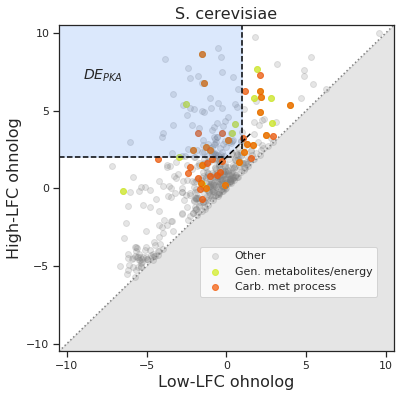

In [17]:
##Goi figure using matplotlib instead of plot.ly and highlighting particular go terms



fig, ax = plt.subplots(figsize=(6,6))

min_lfc = 2.0  # Minimum LFC for the high activation paralog
lfc_diff = 2.0 # Difference in LFC to call a differentially expressed paralog
max_low_lfc = 1.0 # Maximum LFC that low activation paralog can have.  I get a ~20 more if I use 2.5 as the cutoff
log10_pval_min = 1.5 

max_lfc_rep = -2.5
min_lfc_rep = -2.0


# x_data = ohnologs_expression_sorted['log2FoldChange_low']
# y_data = ohnologs_expression_sorted['log2FoldChange_high']

alpha = 0.4
xmax = 10.5
xmin = -xmax
ymax = xmax
ymin = xmin


alpha = 0.7
go_term_subset = OrderedDict({#'Cytoplasmic translation': ('cytoplasmic translation','#ae48d6'),
                              'Gen. metabolites/energy': ('generation of precursor metabolites and energy','#d1ed1c'),
                              #'Oxidative stress': ('response to oxidative stress','#f20e02'),
                              'Carb. met process': ('carbohydrate metabolic process','#f45702')
                              #'Meiotic cell cycle': ('meiotic cell cycle','#0cebf7'),
                              #'Conjugation': ('conjugation','#287ded'),
                              #'Mito. translation': ('mitochondrial translation','#ef26e2'),  #d1ed1c
                              #'rRNA processing': ('rRNA processing','#ae48d6')
                             })
                  
subsets = OrderedDict({'Other': (ohnologs_expression_sorted,
                              'gray',0.2)
                     })


for subset_name, (go_term, color) in go_term_subset.items(): 
    go_term_genes = go_slims_aspect[go_slims_aspect['GO_term']==go_term]['sc_genename']
    subset_df = ohnologs_expression_sorted[(ohnologs_expression_sorted['sc_genename_low'].isin(go_term_genes)) |
                           (ohnologs_expression_sorted['sc_genename_high'].isin(go_term_genes))]
    subsets[subset_name] = (subset_df, color, alpha )
    
for subset_name,(subset,color,alpha) in subsets.items():

    ax.scatter(subset['log2FoldChange_low'], 
               subset['log2FoldChange_high'],
               color = color, alpha = alpha, label = subset_name)


#Lines that define my genes of interest
#(x1, y1), (x2,y2)
line_ext = 0.5
lines = {'Min LFC' : [(xmin, min_lfc), (min_lfc-lfc_diff + line_ext,min_lfc)], 
         'LFC difference thresh' : [(min_lfc-lfc_diff-line_ext,min_lfc-line_ext),(max_low_lfc + line_ext,max_low_lfc+lfc_diff + line_ext )], 
         'Max Low LFC' : [(max_low_lfc,max_low_lfc + lfc_diff -line_ext),(max_low_lfc,ymax)]
#          'Rep_boundary_horiz_max': [(xmin,max_lfc_rep), (max_lfc_rep,max_lfc_rep)],
#          'Rep_boundary_vert_max': [(max_lfc_rep,ymin), (max_lfc_rep,max_lfc_rep)],
#          'Rep_boundary_horiz_min': [(xmin,min_lfc_rep), (min_lfc_rep,min_lfc_rep)],
#          'Rep_boundary_vert_min': [(min_lfc_rep,ymin), (min_lfc_rep,min_lfc_rep)]
        }


for line_name, ((x1,y1),(x2,y2)) in lines.items():
    x = np.array([x1,x2])
    y = np.array([y1,y2])
    ax.plot(x,y,'--', color='black')

#plot y=x
ax.plot([xmin,xmax],[ymin,ymax], ':' , color='gray')

patches = []

#DEPKA patch
x=[xmin, xmin, min_lfc-lfc_diff, max_low_lfc, max_low_lfc]
y=[ymax, min_lfc, min_lfc, max_low_lfc+min_lfc, ymax]
xy = zip(x,y)
polygon = Polygon(list(xy), closed=True, color = "#4d8cf2", alpha=0.2)
patches.append(polygon)

# #rep patch
# x=[xmin, min_lfc_rep, xmin]
# y=[ymin, min_lfc_rep, min_lfc_rep]
# xy = zip(x,y)
# polygon = Polygon(list(xy), closed=True, color = "#399b4a", alpha=0.2)
# patches.append(polygon)

#lower triangle
x=[xmin,xmax,xmax]
y=[ymin,ymin,ymax]
xy = zip(x,y)
polygon = Polygon(list(xy), closed=True, color = "gray", alpha =0.2)
patches.append(polygon)


p = PatchCollection(patches,match_original=True)
#p.set_array(np.array(colors))
ax.add_collection(p)
    
ax.text(-9,7,'$DE_{PKA}$',fontdict={'size':14})
ax.set_xlim([-10.5,10.5])
ax.set_xticks([-10,-5,0,5,10])
ax.set_ylim([-10.5,10.5])
ax.set_yticks([-10,-5,0,5,10])
ax.set_xlabel('LFC of lower ohnolog',fontdict={'size':16})
ax.set_ylabel('LFC of higher ohnolog',fontdict={'size':16})
ax.set_title('S. cerevisiae',fontdict={'size':16})
ax.legend(bbox_to_anchor=(0.42, 0.32), loc=2, borderaxespad=0.)

fig.savefig(os.path.normpath(figsave_dir + "LFC_low_v_high_paralog_act_mpl.svg"))  





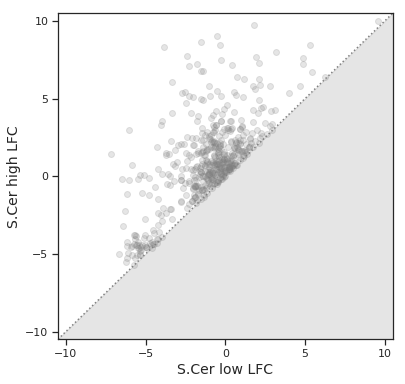

In [10]:
##Simple paralog v.s. paralog plot


fig, ax = plt.subplots(figsize=(6,6))

min_lfc = 2.0  # Minimum LFC for the high activation paralog
lfc_diff = 2.0 # Difference in LFC to call a differentially expressed paralog
max_low_lfc = 1.0 # Maximum LFC that low activation paralog can have.  I get a ~20 more if I use 2.5 as the cutoff
log10_pval_min = 1.5 

max_lfc_rep = -2.5
min_lfc_rep = -2.0


# x_data = ohnologs_expression_sorted['log2FoldChange_low']
# y_data = ohnologs_expression_sorted['log2FoldChange_high']

alpha = 0.4
xmax = 10.5
xmin = -xmax
ymax = xmax
ymin = xmin


alpha = 0.7
go_term_subset = OrderedDict({#'Cytoplasmic translation': ('cytoplasmic translation','#ae48d6'),
                              #'Gen. metabolites/energy': ('generation of precursor metabolites and energy','#d1ed1c'),
                              #'Oxidative stress': ('response to oxidative stress','#f20e02'),
                              #'Carb. met process': ('carbohydrate metabolic process','#f45702')
                              #'Meiotic cell cycle': ('meiotic cell cycle','#0cebf7'),
                              #'Conjugation': ('conjugation','#287ded'),
                              #'Mito. translation': ('mitochondrial translation','#ef26e2'),  #d1ed1c
                              #'rRNA processing': ('rRNA processing','#ae48d6')
                             })
                  
subsets = OrderedDict({'Other': (ohnologs_expression_sorted,
                              'gray',0.2)
                     })


for subset_name, (go_term, color) in go_term_subset.items(): 
    go_term_genes = go_slims_aspect[go_slims_aspect['GO_term']==go_term]['sc_genename']
    subset_df = ohnologs_expression_sorted[(ohnologs_expression_sorted['sc_genename_low'].isin(go_term_genes)) |
                           (ohnologs_expression_sorted['sc_genename_high'].isin(go_term_genes))]
    subsets[subset_name] = (subset_df, color, alpha )
    
for subset_name,(subset,color,alpha) in subsets.items():

    ax.scatter(subset['log2FoldChange_low'], 
               subset['log2FoldChange_high'],
               color = color, alpha = alpha, label = subset_name)


#Lines that define my genes of interest
#(x1, y1), (x2,y2)
line_ext = 0.5
lines = {#'Min LFC' : [(xmin, min_lfc), (min_lfc-lfc_diff + line_ext,min_lfc)], 
         #'LFC difference thresh' : [(min_lfc-lfc_diff-line_ext,min_lfc-line_ext),(max_low_lfc + line_ext,max_low_lfc+lfc_diff + line_ext )], 
         #'Max Low LFC' : [(max_low_lfc,max_low_lfc + lfc_diff -line_ext),(max_low_lfc,ymax)]
#          'Rep_boundary_horiz_max': [(xmin,max_lfc_rep), (max_lfc_rep,max_lfc_rep)],
#          'Rep_boundary_vert_max': [(max_lfc_rep,ymin), (max_lfc_rep,max_lfc_rep)],
#          'Rep_boundary_horiz_min': [(xmin,min_lfc_rep), (min_lfc_rep,min_lfc_rep)],
#          'Rep_boundary_vert_min': [(min_lfc_rep,ymin), (min_lfc_rep,min_lfc_rep)]
        }


for line_name, ((x1,y1),(x2,y2)) in lines.items():
    x = np.array([x1,x2])
    y = np.array([y1,y2])
    ax.plot(x,y,'--', color='black')

#plot y=x
ax.plot([xmin,xmax],[ymin,ymax], ':' , color='gray')

patches = []

# #DEPKA patch
# x=[xmin, xmin, min_lfc-lfc_diff, max_low_lfc, max_low_lfc]
# y=[ymax, min_lfc, min_lfc, max_low_lfc+min_lfc, ymax]
# xy = zip(x,y)
# polygon = Polygon(list(xy), closed=True, color = "#4d8cf2", alpha=0.2)
# patches.append(polygon)

# #rep patch
# x=[xmin, min_lfc_rep, xmin]
# y=[ymin, min_lfc_rep, min_lfc_rep]
# xy = zip(x,y)
# polygon = Polygon(list(xy), closed=True, color = "#399b4a", alpha=0.2)
# patches.append(polygon)

#lower triangle
x=[xmin,xmax,xmax]
y=[ymin,ymin,ymax]
xy = zip(x,y)
polygon = Polygon(list(xy), closed=True, color = "gray", alpha =0.2)
patches.append(polygon)


p = PatchCollection(patches,match_original=True)
#p.set_array(np.array(colors))
ax.add_collection(p)
    
#ax.text(-9,7,'$DE_{PKA(act)}$',fontdict={'size':14})
ax.set_xlim([-10.5,10.5])
ax.set_xticks([-10,-5,0,5,10])
ax.set_ylim([-10.5,10.5])
ax.set_yticks([-10,-5,0,5,10])
ax.set_xlabel('S.Cer low LFC',fontdict={'size':14})
ax.set_ylabel('S.Cer high LFC',fontdict={'size':14})
#ax.legend(bbox_to_anchor=(0.42, 0.32), loc=2, borderaxespad=0.)

fig.savefig(os.path.normpath(figsave_dir + "LFC_low_v_high_paralog_base_mpl.svg"))  





Figure [gois]: Differentially expressed ohnologs were chosen according to four criteria:  1) The minimum fold change for the activated paralog was 2.0.  2) The maximum fold change of the constitutive/repressed paralog was less than 1.0. 3) There was a difference of at least 2.0 in LFC between the activated and constitutive/repressed fold change paralog and 4) the -log10(pvalue) of the activated paralog was above 1.5. 91/511 paralog pairs met this criteria.  

To see whether or not 91/511 paralog pairs being differentially expressed is expected given the distribution of expression values for all those genes I did the following: 

1) Collected N samples of two expression values from the set of all expression values for all paralogs.  

2) Ordered each sample from lowest to highest.  

3) Plotted a Kernel Density Estimate of all the samples

4) Determined which of those pairs met our criteria for differential expression: High sample > 2.0, Low sample <1.0 , High sample - Low sample > 2.0

It turns out that ~23% are differentially expressed under those assumptions (and N=8000).  This is actually more than we see empirically (91/511).  To get a Z score, I could repeat this procedure with N=511 many times (enough to get a distribution for the percentages) and then see how likely getting 17% is.  

In [ ]:
#Started looking at all of these - enriched in both species repressed sets.  
# cytoplasmic translation seemed to be most enriched. 
go_term_list_subset = ['rRNA processing', 'cytoplasmic translation', 
'ribosomal small subunit biogenesis',
'ribosomal large subunit biogenesis', 
'ribosome assembly',
'organelle assembly',
'nuclear transport',
'ribosomal subunit export from nucleus',
'RNA modification',
'translational elongation',
'transcription from RNA polymerase III promoter',
'transcription from RNA polymerase I promoter',
'tRNA processing',
'nucleobase-containing compound transport']


In [145]:
# Count ohnologs that have low LFC

at_least_one_low = ohnologs_expression_sorted[ohnologs_expression_sorted['log2FoldChange_low']<-2.5]
both_low = at_least_one_low[at_least_one_low['log2FoldChange_high']<-2.5]

low_lfc_subsets = {'at_least_one': at_least_one_low, 
                  'both_low': both_low}

for subset_name, low_lfc_subset in low_lfc_subsets.items():
    print(subset_name + ' total N of ohnolog pairs ' + str(len(low_lfc_subset)))
    #gene_set_list = list(at_least_one_low['sc_genename_low']) + list(at_least_one_low['sc_genename_high'])
    gene_set_list = list(low_lfc_subset['sc_genename_low']) + list(low_lfc_subset['sc_genename_high'])
    go_slims_aspect, go_term_list = yeast_esr_exp.load_goslim_data('P')
    go_term_list_subset = ['cytoplasmic translation']
    #get all genes for the go term
    go_term_df = yeast_esr_exp.go_terms_for_genelist(gene_set_list, go_slims_aspect, go_term_list_subset)
    term_genes = go_term_df.loc['cytoplasmic translation', 'genes']
    N_pairs = len(ohnologs_expression_sorted[(ohnologs_expression_sorted['sc_genename_low'].isin(term_genes)) |
                           (ohnologs_expression_sorted['sc_genename_high'].isin(term_genes))])
    print(subset_name + ' Number of ohnolog pairs ' + str(N_pairs) )

both_low total N of ohnolog pairs 56
both_low Number of ohnolog pairs 51
at_least_one total N of ohnolog pairs 110
at_least_one Number of ohnolog pairs 54


In [143]:
len(ohnologs_expression_sorted[(ohnologs_expression_sorted['sc_genename_low'].isin(term_genes)) |
                           (ohnologs_expression_sorted['sc_genename_high'].isin(term_genes))])

54

In [141]:
term_genes = go_term_df_one.loc['cytoplasmic translation', 'genes']

In [137]:
#for a given go term, identify howmany of both of those sets belong to that go term

#gene_set_list = list(at_least_one_low['sc_genename_low']) + list(at_least_one_low['sc_genename_high'])
gene_set_list = list(both_low['sc_genename_low']) + list(both_low['sc_genename_high'])
go_slims_aspect, go_term_list = yeast_esr_exp.load_goslim_data('P')
go_term_list_subset = ['rRNA processing', 'cytoplasmic translation', 
'ribosomal small subunit biogenesis',
'ribosomal large subunit biogenesis', 
'ribosome assembly',
'organelle assembly',
'nuclear transport',
'ribosomal subunit export from nucleus',
'RNA modification',
'translational elongation',
'transcription from RNA polymerase III promoter',
'transcription from RNA polymerase I promoter',
'tRNA processing',
'nucleobase-containing compound transport']
#get all genes for the go term
go_term_df = yeast_esr_exp.go_terms_for_genelist(gene_set_list, go_slims_aspect, go_term_list_subset)

In [136]:
go_term_df_one = go_term_df

In [126]:
    #for a given gene list provides a dataframe listing genes in that list for each go term. 
    go_term_data = []

    go_term_index = []

    for term in go_term_list: 
        term_genes = list(go_slims_aspect[go_slims_aspect['GO_term']==term]['sc_genename'])
        if len(term_genes)> len(set(term_genes)):
            print("Duplicate Term: " + term)
        subset_genes_in_goterm =  set(gene_set_list) & set(term_genes)
        N_subset_genes_in_goterm = len(subset_genes_in_goterm)
        N_genes_in_goterm = len(term_genes)
        if N_subset_genes_in_goterm >0:
            subset_genes_in_goterm_commonname = SC_common_name_lookup(subset_genes_in_goterm)
            go_term_data.append((N_subset_genes_in_goterm,
                                subset_genes_in_goterm,
                                subset_genes_in_goterm_commonname,
                                N_genes_in_goterm))
            go_term_index.append(term)

    go_term_df = pd.DataFrame(go_term_data, index = go_term_index,columns = ['N subset genes in goterm',
                                                                            'genes',
                                                                            'genes common name',
                                                                            'N genes in goterm'])

TypeError: tuple indices must be integers or slices, not str

In [ ]:
# Restrict to certain go terms: 
['rRNA processing', 'cytoplasmic translation', 
'ribosomal small subunit biogenesis',
'ribosomal large subunit biogenesis', 
'ribosome assembly',
'organelle assembly',
'nuclear transport',
'ribosomal subunit export from nucleus',
'RNA modification',
'translational elongation',
'transcription from RNA polymerase III promoter',
'transcription from RNA polymerase I promoter',
'tRNA processing',
'nucleobase-containing compound transport']


In [12]:
ohnolog_values = list(ohnologs_expression_sorted['log2FoldChange_low']) + list(ohnologs_expression_sorted['log2FoldChange_high'])

### Differential expression for repressed genes

In [142]:
ohnologs_goi

,AA %id,Length Ratio,sc_genename_low,log2FoldChange_low,pvalue_low,AS_WT_drug_mean_low,AS_WT_drug_var_low,AS_WT_cont_mean_low,AS_WT_cont_var_low,sc_genename_high,log2FoldChange_high,pvalue_high,AS_WT_drug_mean_high,AS_WT_drug_var_high,AS_WT_cont_mean_high,AS_WT_cont_var_high,SC_common_name_low,SC_common_name_high
Ancestor,,,,,,,,,,,,,,,,,,
Anc_1.22,48%,0.84,YDR524C-B,-2.265164,4.594696e-15,9.657054,0.046498,11.454176,0.030790,YCL048W-A,7.098852,1.547408e-07,3.188691,0.879598,-0.573113,0.012050,YDR524C-B,YCL048W-A
Anc_1.83,65%,0.97,YEL063C,-1.521552,8.382845e-02,2.130857,0.239830,2.999538,0.272571,YNL270C,2.344437,6.496077e-06,5.119996,0.182051,3.361959,0.098494,CAN1,ALP1
Anc_1.182,71%,1.00,YKL166C,0.163338,6.764816e-01,8.127727,0.215865,8.012289,0.073694,YJL164C,3.107876,5.112786e-18,7.412652,0.002352,4.907237,0.101171,TPK3,TPK1
Anc_1.188,74%,0.79,YJL159W,0.721555,7.458852e-02,9.892068,0.112453,9.215623,0.320150,YKL163W,6.400142,8.589156e-38,8.829857,0.090106,3.460216,0.548183,HSP150,PIR3
Anc_1.250,36%,0.49,YJL110C,-1.172085,1.149092e-03,5.777660,0.001493,6.657427,0.098984,YKR034W,2.867489,2.119911e-06,4.844408,0.222520,2.872719,0.047558,GZF3,DAL80
Anc_1.291,51%,0.91,YKR013W,-2.618907,5.514162e-10,9.002973,0.109324,11.040570,0.299849,YJL079C,2.087385,7.120568e-09,8.155874,0.074570,6.402071,0.125700,PRY2,PRY1
Anc_1.356,66%,0.96,YFR024C-A,0.974981,4.228515e-03,8.074899,0.066832,7.258177,0.104045,YHR016C,3.588012,2.253367e-37,10.074642,0.018901,7.104792,0.025183,LSB3,YSC84
Anc_1.374,53%,1.00,YOL016C,-0.093800,8.412065e-01,10.781441,0.392573,10.857649,0.284604,YFR014C,3.057298,9.084646e-27,8.847972,0.011738,6.304962,0.016060,CMK2,CMK1
Anc_1.391,83%,1.00,YLR249W,-6.039649,6.148380e-68,9.071749,0.064966,13.729717,0.140777,YNL014W,2.988226,1.327033e-14,6.530991,0.018895,4.211253,0.017798,YEF3,HEF3


In [19]:

# Identify diff expressed genes with at least one repressed GOI based on LFC / pval thresholds


max_lfc = -2.0  # Maximum LFC for the low activation paralog
lfc_diff = 2.0 # Difference in LFC to call a differentially expressed paralog
min_high_lfc = -1.0 # minimum LFC that high activation paralog can have.  
log10_pval_min = 1.5 

goi_criteria_rep = {'max_lfc': max_lfc, 'lfc_diff': lfc_diff, 'min_high_lfc' : min_high_lfc, 'log10_pval_min': log10_pval_min}

ohnologs_goi_rep = ohnologs_expression_sorted[(ohnologs_expression_sorted['log2FoldChange_low']<max_lfc) &
                                          ((ohnologs_expression_sorted['log2FoldChange_high']-ohnologs_expression_sorted['log2FoldChange_low'])>lfc_diff) &
                                          (ohnologs_expression_sorted['log2FoldChange_high'] > min_high_lfc) & 
                                          ((-np.log10(ohnologs_expression_sorted['pvalue_high']))>log10_pval_min) ]

print(len(ohnologs_goi_rep))

#Save list and all sorted ohnolog dataframe as well
fname = data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/gois_rep_20190812.pkl')

with open(fname, 'wb') as file:
    pickle.dump([ohnologs_goi_rep,ohnologs_expression_sorted,goi_criteria_rep], file)

ohnologs_goi_rep

30


,AA %id,Length Ratio,sc_genename_low,log2FoldChange_low,pvalue_low,AS_WT_drug_mean_low,AS_WT_drug_var_low,AS_WT_cont_mean_low,AS_WT_cont_var_low,sc_genename_high,log2FoldChange_high,pvalue_high,AS_WT_drug_mean_high,AS_WT_drug_var_high,AS_WT_cont_mean_high,AS_WT_cont_var_high,SC_common_name_low,SC_common_name_high
Ancestor,,,,,,,,,,,,,,,,,,
Anc_1.22,48%,0.84,YDR524C-B,-2.265164,4.594696e-15,9.657054,0.046498,11.454176,0.030790,YCL048W-A,7.098852,1.547408e-07,3.188691,0.879598,-0.573113,0.012050,YDR524C-B,YCL048W-A
Anc_1.50,67%,0.95,YDR508C,-2.142715,3.769031e-12,7.716064,0.018154,9.391980,0.072810,YCL025C,1.240818,6.002173e-06,9.098904,0.033729,8.070856,0.012734,GNP1,AGP1
Anc_1.140,55%,0.89,YCR034W,-3.038190,1.024935e-14,5.463364,0.093550,7.784543,0.140994,YJL196C,0.892365,2.848497e-02,8.831847,0.313281,8.135656,0.095426,ELO2,ELO1
Anc_1.291,51%,0.91,YKR013W,-2.618907,5.514162e-10,9.002973,0.109324,11.040570,0.299849,YJL079C,2.087385,7.120568e-09,8.155874,0.074570,6.402071,0.125700,PRY2,PRY1
Anc_1.391,83%,1.00,YLR249W,-6.039649,6.148380e-68,9.071749,0.064966,13.729717,0.140777,YNL014W,2.988226,1.327033e-14,6.530991,0.018895,4.211253,0.017798,YEF3,HEF3
Anc_1.422,78%,0.96,YCR005C,-2.061602,6.840961e-05,4.331823,0.181492,5.818209,0.248304,YNR001C,2.477500,3.958225e-12,7.033292,0.012285,4.967191,0.091396,CIT2,CIT1
Anc_1.482,83%,0.96,YJR048W,-2.514324,8.251267e-16,6.513864,0.042561,8.499493,0.046956,YEL039C,5.430983,2.107897e-15,6.998704,0.673781,2.653848,0.809126,CYC1,CYC7
Anc_2.202,54%,0.99,YNL087W,-3.519871,1.106793e-23,6.786788,0.110654,9.552843,0.045844,YOR086C,1.413798,7.174386e-06,9.973997,0.007133,8.763206,0.138558,TCB2,TCB1
Anc_2.417,99%,1.00,YLR029C,-5.859214,1.966426e-20,4.746040,0.073161,8.784803,1.228587,YMR121C,0.700084,2.954765e-02,8.701910,0.041953,8.093430,0.086568,RPL15A,RPL15B


In [144]:
depka_both = ohnologs_goi.loc[(set(ohnologs_goi_rep.index) & set(ohnologs_goi.index)),:]
print(len(depka_both))
depka_both

20


,AA %id,Length Ratio,sc_genename_low,log2FoldChange_low,pvalue_low,AS_WT_drug_mean_low,AS_WT_drug_var_low,AS_WT_cont_mean_low,AS_WT_cont_var_low,sc_genename_high,log2FoldChange_high,pvalue_high,AS_WT_drug_mean_high,AS_WT_drug_var_high,AS_WT_cont_mean_high,AS_WT_cont_var_high,SC_common_name_low,SC_common_name_high
Ancestor,,,,,,,,,,,,,,,,,,
Anc_1.422,78%,0.96,YCR005C,-2.061602,6.840961e-05,4.331823,0.181492,5.818209,0.248304,YNR001C,2.477500,3.958225e-12,7.033292,0.012285,4.967191,0.091396,CIT2,CIT1
Anc_1.291,51%,0.91,YKR013W,-2.618907,5.514162e-10,9.002973,0.109324,11.040570,0.299849,YJL079C,2.087385,7.120568e-09,8.155874,0.074570,6.402071,0.125700,PRY2,PRY1
Anc_3.372,71%,1.00,YPR074C,-3.878108,1.499922e-03,4.916410,1.411789,7.942811,1.603907,YBR117C,8.289842,1.975908e-14,6.218816,0.115515,0.309360,0.218959,TKL1,TKL2
Anc_6.256,31%,0.54,YMR182C,-2.302089,1.759370e-01,1.032993,0.141002,1.691123,0.268110,YPL230W,5.133590,2.029018e-22,7.927391,0.537149,3.824072,0.217542,RGM1,USV1
Anc_3.105,59%,0.96,YOL092W,-2.057035,5.365090e-06,6.822864,0.167644,8.401267,0.416939,YBR147W,5.120015,7.208697e-31,7.542687,0.106616,3.499842,0.021620,YPQ1,RTC2
Anc_7.256,81%,0.98,YER070W,-3.408690,6.073492e-08,6.097029,0.864478,8.856475,0.708546,YIL066C,2.255963,1.623397e-03,4.113676,0.604995,2.626676,0.235200,RNR1,RNR3
Anc_5.83,71%,0.88,YHR162W,-2.136243,9.507614e-12,9.082386,0.008178,10.773660,0.098065,YGR243W,4.040633,1.457305e-09,4.696593,0.091016,1.935070,0.040274,MPC2,MPC3
Anc_3.267,49%,0.78,YBR056W-A,-3.324113,6.947490e-10,4.625804,0.557705,7.203943,0.073351,YDR034W-B,6.057692,1.230060e-44,9.364550,0.143885,4.232978,0.281780,YBR056W-A,YDR034W-B
Anc_8.644,62%,0.99,YOR222W,-2.811878,1.567945e-15,7.019319,0.010801,9.167815,0.158582,YPL134C,2.055437,1.272628e-02,3.679219,0.586694,2.239096,0.624402,ODC2,ODC1


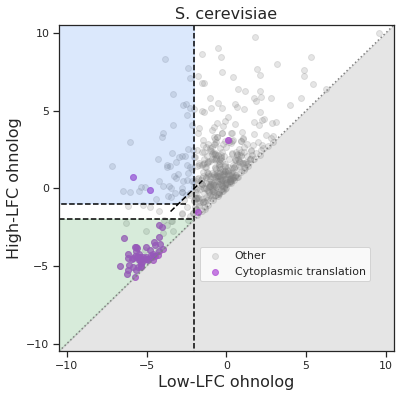

In [21]:
##Goi figure using matplotlib instead of plot.ly and highlighting particular go terms



fig, ax = plt.subplots(figsize=(6,6))

max_lfc = goi_criteria_rep['max_lfc']  # Maximum LFC for the low activation paralog
lfc_diff = goi_criteria_rep['lfc_diff'] # Difference in LFC to call a differentially expressed paralog
min_high_lfc = goi_criteria_rep['min_high_lfc'] # minimum LFC that high activation paralog can have.  
log10_pval_min = goi_criteria_rep['log10_pval_min']


# x_data = ohnologs_expression_sorted['log2FoldChange_low']
# y_data = ohnologs_expression_sorted['log2FoldChange_high']

alpha = 0.4
xmax = 10.5
xmin = -xmax
ymax = xmax
ymin = xmin


alpha = 0.7
go_term_subset = OrderedDict({'Cytoplasmic translation': ('cytoplasmic translation','#ae48d6'),
                              #'Gen. metabolites/energy': ('generation of precursor metabolites and energy','#d1ed1c'),
                              #'Oxidative stress': ('response to oxidative stress','#f20e02'),
                              #'Carb. met process': ('carbohydrate metabolic process','#f45702')
                              #'Meiotic cell cycle': ('meiotic cell cycle','#0cebf7'),
                              #'Conjugation': ('conjugation','#287ded'),
                              #'Mito. translation': ('mitochondrial translation','#ef26e2')  #d1ed1c
                              #'rRNA processing': ('rRNA processing','#ae48d6')
                             })
                  
subsets = OrderedDict({'Other': (ohnologs_expression_sorted,
                              'gray',0.2)
                     })


for subset_name, (go_term, color) in go_term_subset.items(): 
    go_term_genes = go_slims_aspect[go_slims_aspect['GO_term']==go_term]['sc_genename']
    subset_df = ohnologs_expression_sorted[(ohnologs_expression_sorted['sc_genename_low'].isin(go_term_genes)) |
                           (ohnologs_expression_sorted['sc_genename_high'].isin(go_term_genes))]
    subsets[subset_name] = (subset_df, color, alpha )
    
for subset_name,(subset,color,alpha) in subsets.items():

    ax.scatter(subset['log2FoldChange_low'], 
               subset['log2FoldChange_high'],
               color = color, alpha = alpha, label = subset_name)


#Lines that define my genes of interest
#(x1, y1), (x2,y2)
line_ext = 0.5
lines = {'Max LFC' : [(max_lfc,ymax), (max_lfc,ymin)],   #max_lfc + lfc_diff-line_ext
         'LFC difference thresh' : [(min_high_lfc-lfc_diff-line_ext, min_high_lfc-line_ext),(max_lfc+line_ext, max_lfc + lfc_diff+line_ext)], 
         'Max Low LFC' : [(min_high_lfc-lfc_diff+line_ext,min_high_lfc),(xmin,min_high_lfc)],
         'Max LFC xaxis': [(xmin, max_lfc), (max_lfc,max_lfc)]

#          'Rep_boundary_horiz_max': [(xmin,max_lfc_rep), (max_lfc_rep,max_lfc_rep)],
#          'Rep_boundary_vert_max': [(max_lfc_rep,ymin), (max_lfc_rep,max_lfc_rep)],
#          'Rep_boundary_horiz_min': [(xmin,min_lfc_rep), (min_lfc_rep,min_lfc_rep)],
#          'Rep_boundary_vert_min': [(min_lfc_rep,ymin), (min_lfc_rep,min_lfc_rep)]
        }


for line_name, ((x1,y1),(x2,y2)) in lines.items():
    x = np.array([x1,x2])
    y = np.array([y1,y2])
    ax.plot(x,y,'--', color='black')

#plot y=x
ax.plot([xmin,xmax],[ymin,ymax], ':' , color='gray')

patches = []

#DEPKA patch
x=[xmin, xmin, min_high_lfc-lfc_diff,max_lfc, max_lfc]
y=[ymax, min_high_lfc, min_high_lfc, max_lfc + lfc_diff, ymax]
xy = zip(x,y)
polygon = Polygon(list(xy), closed=True, color = "#4d8cf2" , alpha=0.2) #"#4d8cf2"
patches.append(polygon)

#rep patch
x=[xmin, max_lfc, xmin]
y=[ymin, max_lfc, max_lfc]
xy = zip(x,y)
polygon = Polygon(list(xy), closed=True, color = "#399b4a", alpha=0.2)
patches.append(polygon)

#lower triangle
x=[xmin,xmax,xmax]
y=[ymin,ymin,ymax]
xy = zip(x,y)
polygon = Polygon(list(xy), closed=True, color = "gray", alpha =0.2)
patches.append(polygon)


p = PatchCollection(patches,match_original=True)
#p.set_array(np.array(colors))
ax.add_collection(p)
    
#ax.text(-9,7,'$DE_{PKA(rep)}$',fontdict={'size':14})
ax.set_xlim([-10.5,10.5])
ax.set_xticks([-10,-5,0,5,10])
ax.set_ylim([-10.5,10.5])
ax.set_yticks([-10,-5,0,5,10])
ax.set_xlabel('LFC of lower ohnolog',fontdict={'size':16})
ax.set_ylabel('LFC of higher ohnolog',fontdict={'size':16})
ax.set_title('S. cerevisiae',fontdict={'size':16})
ax.legend(bbox_to_anchor=(0.42, 0.32), loc=2, borderaxespad=0.)



fig.savefig(os.path.normpath(figsave_dir + "LFC_low_v_high_paralog_rep_mpl.svg"))  


### Make a treemap of ohnologs and DEpka expression

509


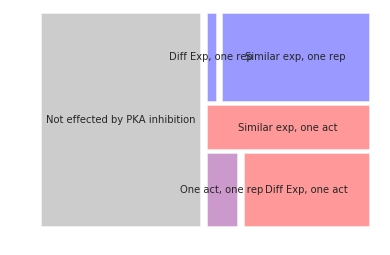

In [23]:
no_act_rep = 509- (129+148-20)
act_rep = 20
DE_rep_no_act_rep = 30-20
DE_act_no_act_rep = 91-20
act_no_DE = 148-91
rep_no_DE = 129-30
rep_both_strong = 62
act_both_strong = 25

print(no_act_rep+act_rep+DE_rep_no_act_rep+DE_act_no_act_rep+act_no_DE + rep_no_DE)

squarify.plot(sizes=[no_act_rep, act_rep, DE_act_no_act_rep, act_no_DE, DE_rep_no_act_rep,  rep_no_DE],
                     label=["Not effected by PKA inhibition", "One act, one rep", "Diff Exp, one act", "Similar exp, one act", "Diff Exp, one rep", "Similar exp, one rep"], 
                     color=["grey","purple","red","red","blue","blue"], alpha=.4 , pad=True)
plt.axis('off')
plt.show()

In [24]:
no_act_rep = 509- (129+148-20)
act_rep = 20
DE_rep_no_act_rep = 30-20
DE_act_no_act_rep = 91-20
act_no_DE = 148-91
rep_no_DE = 129-30
rep_both_strong = 62
act_both_strong = 25

ratio = 1.5
tot = no_act_rep+act_rep+DE_rep_no_act_rep+DE_act_no_act_rep+act_no_DE + rep_no_DE
y_tot = np.sqrt(tot/ratio)
x_not_eff = no_act_rep/tot*ratio*y_tot
x_eff = (tot-no_act_rep)/tot*ratio*y_tot
y_act_no_DE = act_no_DE/x_eff
y_rep_no_DE = rep_no_DE/x_eff
y_DE = y_tot -(y_act_no_DE + y_rep_no_DE)
x_DE_act = DE_act_no_act_rep/y_DE
x_DE_rep = DE_rep_no_act_rep/y_DE
x_act_rep = act_rep/y_DE
x_rep_both_strong = (rep_both_strong/rep_no_DE)*x_eff
x_act_both_strong = (act_both_strong/act_no_DE)*x_eff
print(x_eff - (x_DE_act+x_DE_rep + x_act_rep)) #should be 0

#Use these coordinates to plot the boxes in the right places making a list of rects

act_color = 'cyan'
rep_color = 'magenta'
act_rep_color = "#1703fc"
no_eff_color = 'grey'




rects = [
    {'dx': x_DE_act, 'dy': y_DE, 'x': 0, 'y':y_rep_no_DE,   #DE act
     'hatch': '', 'color':act_color, 
     'label': 'One strong act., one no change', 'N':DE_act_no_act_rep },      
    {'dx': x_act_both_strong, 'dy': y_act_no_DE, 'x':0 , 'y':y_tot-y_act_no_DE, #Both strong act
     'hatch': '...', 'color': act_color, 
     'label': 'Both strong act.', 'N':act_both_strong },      
    {'dx': x_eff-x_act_both_strong , 'dy': y_act_no_DE  , 'x': x_act_both_strong, 'y': y_tot-y_act_no_DE, #One strong, one weak act
     'hatch': '//', 'color': act_color, 
     'label': 'One strong act., one weak act.', 'N': act_no_DE-act_both_strong  },     
    {'dx': x_act_rep, 'dy': y_DE, 'x': x_DE_act, 'y':y_rep_no_DE, #DE act rep
     'hatch': '', 'color':act_rep_color, 
     'label': 'One strong act., one strong rep.', 'N': act_rep },      
    {'dx': x_DE_rep, 'dy': y_DE, 'x': x_DE_act+x_act_rep, 'y': y_rep_no_DE,   #DE rep
     'hatch': '', 'color': rep_color, 
     'label': 'One strong rep., one no change', 'N': DE_rep_no_act_rep },    
    {'dx': x_rep_both_strong , 'dy': y_rep_no_DE  , 'x': 0, 'y': 0 , #Both strong rep
     'hatch': '...', 'color':rep_color, 
     'label':'Both strong rep.', 'N': rep_both_strong},      
    {'dx': x_eff-x_rep_both_strong , 'dy': y_rep_no_DE  , 'x': x_rep_both_strong, 'y': 0, #One strong, one weak rep
     'hatch': '//', 'color': rep_color, 
     'label': 'One strong rep., one weak rep.', 'N': rep_no_DE-rep_both_strong },         
    {'dx': x_not_eff, 'dy': y_tot , 'x': x_eff , 'y':0, #not effected by PKA
     'hatch': '', 'color': no_eff_color, 
     'label': 'Not effected by PKA', 'N':  no_act_rep}      
    
]



rects

-5.329070518200751e-15


[{'N': 71,
  'color': 'cyan',
  'dx': 9.807466573866014,
  'dy': 7.239382307883048,
  'hatch': '',
  'label': 'One strong act., one no change',
  'x': 0,
  'y': 7.096028202776456},
 {'N': 25,
  'color': 'cyan',
  'dx': 6.119064269585292,
  'dy': 4.08559199553796,
  'hatch': '...',
  'label': 'Both strong act.',
  'x': 0,
  'y': 14.335410510659504},
 {'N': 32,
  'color': 'cyan',
  'dx': 7.832402265069175,
  'dy': 4.08559199553796,
  'hatch': '//',
  'label': 'One strong act., one weak act.',
  'x': 6.119064269585292,
  'y': 14.335410510659504},
 {'N': 20,
  'color': '#1703fc',
  'dx': 2.762666640525638,
  'dy': 7.239382307883048,
  'hatch': '',
  'label': 'One strong act., one strong rep.',
  'x': 9.807466573866014,
  'y': 7.096028202776456},
 {'N': 10,
  'color': 'magenta',
  'dx': 1.381333320262819,
  'dy': 7.239382307883048,
  'hatch': '',
  'label': 'One strong rep., one no change',
  'x': 12.570133214391653,
  'y': 7.096028202776456},
 {'N': 62,
  'color': 'magenta',
  'dx': 8.7372

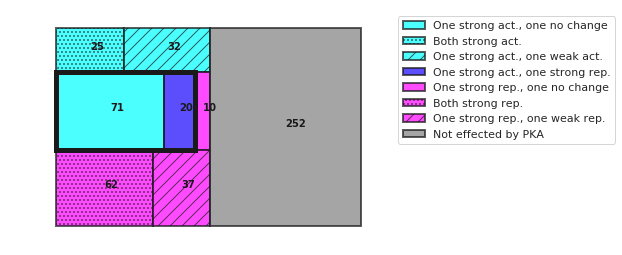

In [37]:
#Plotting routine from squarify

# bar_kwargs = None
# label = None
# text_kwargs = None
# kwargs = None

fig, ax = plt.subplots()

# if color is None:
#     import matplotlib.cm
#     import random

#     cmap = matplotlib.cm.get_cmap()
#     color = [cmap(random.random()) for i in range(len(rects))]

# if bar_kwargs is None:
#     bar_kwargs = {}
# if text_kwargs is None:
#     text_kwargs = {}
# if len(kwargs) > 0:
#     bar_kwargs.update(kwargs)

# normed = normalize_sizes(sizes, norm_x, norm_y)

# if pad:
#     rects = padded_squarify(normed, 0, 0, norm_x, norm_y)
# else:
#     rects = squarify(normed, 0, 0, norm_x, norm_y)

x = [rect["x"] for rect in rects]
y = [rect["y"] for rect in rects]
dx = [rect["dx"] for rect in rects]
dy = [rect["dy"] for rect in rects]
hatches = [rect['hatch'] for rect in rects]
colors = [rect['color'] for rect in rects]
labels = [rect['label'] for rect in rects]
Ns = [rect['N'] for rect in rects]


bars = ax.bar(x, dy, width=dx, bottom=y, color=colors, edgecolor = 'k', align="edge", linewidth = 2.0,alpha=0.7) #, hatch = hatches)

 
for bar, hatch,label in zip(bars,hatches,labels): 
    bar.set_hatch(hatch)
    bar.set_label(label)

for rect in rects: 
    ax.text(rect['x']+rect['dx']/2, rect['y'] + rect['dy']/2, str(rect['N']), fontdict={'color': 'k','weight':'bold'})
    
# for rect in rects: 
#     ax.add_patch(Rectangle((rect['x'],rect['y']), rect['dy'], rect['dx'], edgecolor = 'k')) #, hatch=rect['hatch'], color = rect['color'])) #, transform=ax.transAxes)


# if not value is None:
#     va = "center" if label is None else "top"

#     for v, r in zip(value, rects):
#         x, y, dx, dy = r["x"], r["y"], r["dx"], r["dy"]
#         ax.text(x + dx / 2, y + dy / 2, v, va=va, ha="center", **text_kwargs)

# if not label is None:
#     va = "center" if value is None else "bottom"
#     for l, r in zip(label, rects):
#         x, y, dx, dy = r["x"], r["y"], r["dx"], r["dy"]
#         ax.text(x + dx / 2, y + dy / 2, l, va=va, ha="center", **text_kwargs)

# ax.set_xlim(0, norm_x)
# ax.set_ylim(0, norm_y)
#ax.legend()
#"#c2c2c2"
#ax.add_patch(Rectangle((0, y_rep_no_DE), x_DE_act+x_act_rep, y_DE, edgecolor = 'grey',fill=False, hatch = '/')) #, transform=ax.transAxes)
ax.add_patch(Rectangle((0, y_rep_no_DE), x_DE_act+x_act_rep, y_DE, edgecolor = 'k',fill=False, lw=5)) #, transform=ax.transAxes)


# legend_elements = [#Line2D([0], [0], color='b', lw=4, label='Line'),
#                    #Line2D([0], [0], marker='o', color='w', label='Scatter',
#                    #       markerfacecolor='g', markersize=15),
#                    Patch(facecolor=act_color, edgecolor=act_color,
#                          label='At least one ohnolog activated'), 
#                    Patch(facecolor=rep_color, edgecolor=rep_color,
#                          label='At least one ohnolog repressed'), 
#                    Patch(facecolor=act_rep_color, edgecolor=act_rep_color,
#                          label='One ohnolog activated, one ohnolog repressed'), 
#                    Patch(facecolor=no_eff_color, edgecolor=no_eff_color,
#                          label='Not effected by PKA inhibition'), 
#                    Patch(fill=False, edgecolor= 'grey', hatch = '///',
#                          label='$DE_{PKA}$') 
#                     ]

ax.legend(bbox_to_anchor=(1.05,1.0))
#ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1.0)) #, loc='center')
ax.set_ylim([-0.2,20])
ax.axis('off')
#plt.show()


fig.savefig(os.path.normpath(figsave_dir + "ohnolog_pair_treemap.svg"))  


In [46]:
ax.text?

### Make a tidy table for inclusion in supplementary data

In [123]:
#Make tidy table for inclusion in supplementary data

#add columns for DEpka_act and DEpka_rep
depka_act = []
depka_rep = []
for item in ohnologs_expression_sorted.index: 
    depka_act_val = False
    if item in ohnologs_goi.index: 
        depka_act_val = True
    depka_act.append(depka_act_val)
    
    depka_rep_val = False
    if item in ohnologs_goi_rep.index: 
        depka_rep_val = True
    depka_rep.append(depka_rep_val)


ohnologs_expression_sorted['DE_pka_act'] = depka_act
ohnologs_expression_sorted['DE_pka_rep'] = depka_rep

#Want to add: 


#at least one orth act ()
#at least one orth rep ()
#act/rep/no change (Fig S2)

#DEpka act
#DEpka rep

#KL data
#KL orth act, rep, no change (LFC<-2.0, -log10(pval)>1.5)
#KL orth act/rep/no change (fig S2)


columns_to_include = ['SC_common_name_high','SC_common_name_low','sc_genename_high', 'sc_genename_low', 'AA %id', 'Length Ratio',
                      'log2FoldChange_high', 'pvalue_high', 'AS_WT_cont_mean_high', 'AS_WT_drug_mean_high',
                      'log2FoldChange_low','pvalue_low', 'AS_WT_cont_mean_low','AS_WT_drug_mean_low', 
                      'DE_pka_act', 'DE_pka_rep'
                     ]

ohnologs_expression_sorted.loc[:,columns_to_include].sort_values('log2FoldChange_high', ascending=False)

,SC_common_name_high,SC_common_name_low,sc_genename_high,sc_genename_low,AA %id,Length Ratio,log2FoldChange_high,pvalue_high,AS_WT_cont_mean_high,AS_WT_drug_mean_high,log2FoldChange_low,pvalue_low,AS_WT_cont_mean_low,AS_WT_drug_mean_low,DE_pka_act,DE_pka_rep
Ancestor,,,,,,,,,,,,,,,,
Anc_6.246,SIP18,GRE1,YMR175W,YPL223C,18%,0.47,9.978953,2.761239e-97,3.369399,11.638421,9.563095,2.956582e-15,2.973327,11.010817,False,False
Anc_8.802,DDR2,HOR7,YOL052C-A,YMR251W-A,45%,0.97,9.723893,9.595800e-65,3.748121,11.696041,1.768737,1.260614e-06,12.277752,13.850876,False,False
Anc_8.454,RTN2,RTN1,YDL204W,YDR233C,25%,0.75,9.055758,1.510515e-47,2.540846,9.635058,-0.499323,3.657777e-01,7.892480,7.498897,True,False
Anc_2.382,NDE2,NDE1,YDL085W,YMR145C,57%,0.97,8.671508,1.544835e-53,2.724188,9.400588,-1.545259,1.954957e-08,10.143253,8.919748,True,False
Anc_2.55,YNL194C,FMP45,YNL194C,YDL222C,47%,0.97,8.461673,5.879089e-05,-0.219049,3.590527,5.310947,2.003542e-04,-0.363775,1.887995,False,False
Anc_4.188,NQM1,TAL1,YGR043C,YLR354C,68%,0.99,8.433640,3.293212e-20,0.953706,7.082337,-0.353508,6.356106e-01,5.945874,6.091445,True,False
Anc_3.372,TKL2,TKL1,YBR117C,YPR074C,71%,1.00,8.289842,1.975908e-14,0.309360,6.218816,-3.878108,1.499922e-03,7.942811,4.916410,True,True
Anc_6.309,YMR206W,YNR014W,YMR206W,YNR014W,26%,0.68,8.022101,2.826848e-10,0.159827,4.320121,3.176022,8.857384e-10,4.322148,6.949645,False,False
Anc_5.55,GND2,GND1,YGR256W,YHR183W,87%,0.99,7.771223,4.532653e-86,4.879949,11.464335,-2.396217,4.987727e-06,7.466869,5.825615,True,True


### Check to see if the number of differentially expressed ohnologs is "expected"

Short answer was that it does seem expected if your expectation is that expression values are randomly assigned to paralogs.  
If there is expectation that the paralogs retain some shared expression then it would be less expected, but very hard to quantify that. Rather going to focus on comparing numbers of diff expressed genes between activated and repressed genes. 

samples made


Text(0,0.5,'High sampled LFC')

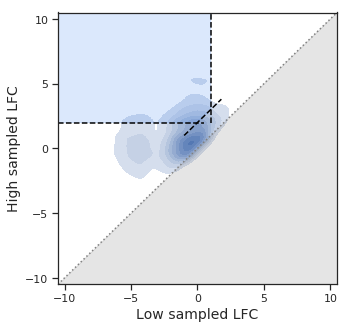

In [77]:
fig, ax = plt.subplots(1,1, figsize=(5,5))

xmax = 10.5
xmin = -xmax
ymax = xmax
ymin = xmin


sample0 = np.random.choice(ohnolog_values, size=2, replace=False)
sample0.sort()
sample0=sample0[np.newaxis,:]
samples = sample0
for jj in range(0,8000):
    sample=np.random.choice(ohnolog_values, size=2, replace=False)
    sample.sort()
    sample=sample[np.newaxis,:]
    samples = np.concatenate((samples,sample))
print('samples made')
sns.kdeplot(samples[:,0],samples[:,1], ax=ax, shade=True, shade_lowest=False)

lines = {'Min LFC' : [(xmin, min_lfc), (0.5,min_lfc)], 
         'LFC difference thresh' : [(-1,lfc_diff-1),(3.8-lfc_diff, 3.8)], 
         'Max Low LFC' : [(max_low_lfc, min_lfc),(max_low_lfc,ymax)]
        }

for line_name, ((x1,y1),(x2,y2)) in lines.items():
    x = np.array([x1,x2])
    y = np.array([y1,y2])
    ax.plot(x,y,'--', color='black')

ax.plot([xmin,xmax],[ymin,ymax], ':' , color='gray')

patches = []
x=[xmin, xmin, 0, max_low_lfc, max_low_lfc]
y=[ymax, min_lfc, min_lfc, max_low_lfc+min_lfc, ymax]
xy = zip(x,y)
polygon = Polygon(list(xy), closed=True, color = "#4d8cf2", alpha=0.2)
patches.append(polygon)

x=[xmin,xmax,xmax]
y=[ymin,ymin,ymax]
xy = zip(x,y)
polygon = Polygon(list(xy), closed=True, color = "gray", alpha =0.2)
patches.append(polygon)
p = PatchCollection(patches,match_original=True)
#p.set_array(np.array(colors))
ax.add_collection(p)


#ax.text(-9,7,'$DE_{PKA}$',fontdict={'size':14})
ax.set_xlim([-10.5,10.5])
ax.set_xticks([-10,-5,0,5,10])
ax.set_ylim([-10.5,10.5])
ax.set_yticks([-10,-5,0,5,10])
ax.set_xlabel('Low sampled LFC',fontdict={'size':14})
ax.set_ylabel('High sampled LFC',fontdict={'size':14})



In [78]:
high_sample = samples[:,1]
high_LFC = (high_sample > 2.0)

low_sample = samples[:,0]
low_LFC = (low_sample < 1.0)

diff_test = ((high_sample-low_sample)>2.0)

sum((high_LFC & low_LFC)&diff_test)/len(samples)

0.23134608173978252

In [93]:
N=511
pcts = []
for kk in range(0,2000): 
    sample0 = np.random.choice(ohnolog_values, size=2, replace=False)
    sample0.sort()
    sample0=sample0[np.newaxis,:]
    samples = sample0
    for jj in range(0,N):
        sample=np.random.choice(ohnolog_values, size=2, replace=False)
        sample.sort()
        sample=sample[np.newaxis,:]
        samples = np.concatenate((samples,sample))
    high_sample = samples[:,1]
    high_LFC = (high_sample > 2.0)
    if np.mod(kk,100)==0:
        print(kk)
    low_sample = samples[:,0]
    low_LFC = (low_sample < 1.0)

    diff_test = ((high_sample-low_sample)>2.0)

    pcts.append(sum((high_LFC & low_LFC)&diff_test)/len(samples))
    



0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


(array([   2.,    2.,    4.,    8.,   11.,   23.,   33.,   37.,   51.,
          92.,   96.,  103.,  151.,  155.,  153.,  169.,  146.,  130.,
         129.,  139.,   94.,   82.,   58.,   56.,   34.,   16.,   14.,
           8.,    3.,    1.]),
 array([ 0.17382812,  0.17766927,  0.18151042,  0.18535156,  0.18919271,
         0.19303385,  0.196875  ,  0.20071615,  0.20455729,  0.20839844,
         0.21223958,  0.21608073,  0.21992187,  0.22376302,  0.22760417,
         0.23144531,  0.23528646,  0.2391276 ,  0.24296875,  0.2468099 ,
         0.25065104,  0.25449219,  0.25833333,  0.26217448,  0.26601562,
         0.26985677,  0.27369792,  0.27753906,  0.28138021,  0.28522135,
         0.2890625 ]),
 <a list of 30 Patch objects>)

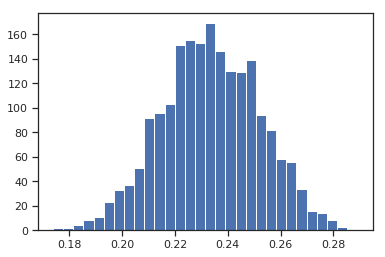

In [99]:
plt.hist(pcts, bins=30)

In [103]:
sum(np.array(pcts) < (91/511))/2000

0.001

In [ ]:
##Haven't run this with the SC name yet

#Plot Deseq LFC v.s. pValue for AS -/+ drug
hover_text = pkainh_deseq['SC_common_name']

lines = {}
for geneset in ['act', 'rep']: 
    
    lines[geneset + ' threshold'] = coords['pkainh_' + geneset][0:2]
    
    yminline_p1, yminline_p2 = expression_plots.pval_min_line(coords['pkainh_' + geneset][0:2], coords['pkainh_' + geneset][2], x_data)

    lines[geneset + ' pval min'] = [yminline_p1, yminline_p2] 



fig = expression_plots.lfc_padj_plot_with_lines(x_data,y_data,hover_text,lines)

py.iplot(fig, filename='RNAseq2018_SC_PKA_AS_pmNMPP1')

## Msn2/4 Deletion analysis

In [4]:
#Merge PKA inh and PKA inh m24del deseq data
pkainh_deseq_merged = pkainh_deseq.merge(pkainh_m24del_deseq, how = 'inner', left_index = True, right_index = True, suffixes=('_WT','_M24'))


In [5]:
##Plot effect of drug on WT v.s. Msn2/4 delete background

AS_lfc_thresh = 2.0

pkainh_deseq_merged_rep = pkainh_deseq_merged[pkainh_deseq_merged['log2FoldChange_WT']<0]
slope, intercept, r_value, p_value, std_err = stats.linregress(pkainh_deseq_merged_rep['log2FoldChange_WT'], pkainh_deseq_merged_rep['log2FoldChange_M24'])
print('slope : {0:.2f}, intercept: {1:.2f}, R: {2:.2f}'.format(slope,intercept,r_value))

#Separate into different groups: 

#Intersect with pkainh_deseq_merged index to make sure all are contained.  
#I wonder why I have extra in my target sets v.s. the pkainh database:  {'YBR117C', 'YCL048W-A'}
#Others missing from pkainh_act set: 
#{'YBR117C', 'YCL048W-A', 'YDR048C', 'YGL014C-A', 'YLR331C'}

plot_subsets = {'pkainh_act': (target_sets['pkainh_act'] & set(pkainh_deseq_merged.index)), 
                'not pkainh_act': set(pkainh_deseq_merged.index)-target_sets['pkainh_act'],
                'DEpka_low': (set(ohnologs_goi['sc_genename_low']) & set(pkainh_deseq_merged.index)),
                'DEpka_high': (set(ohnologs_goi['sc_genename_high']) & set(pkainh_deseq_merged.index))}

subset_labels = {'pkainh_act': '$ \\text{Induced by PKA inhibition}$', 
                 'not pkainh_act': '$ \\text{Not Induced by PKA inhibition}$', 
                 'DEpka_high': '$DE_{PKA} \\text{ high-induction}$', 
                 'DEpka_low': '$DE_{PKA} \\text{ low-induction}$'}

params =  {'pkainh_act': {'color': 'cyan', 'alpha': 0.5},
           'not pkainh_act': {'color':'grey', 'alpha': 0.3},
           'DEpka_low': {'color':'blue', 'alpha':0.8},
           'DEpka_high': {'color':'red', 'alpha':0.8}
          }
            


data = []


                                 
for subset_name in ['not pkainh_act','pkainh_act','DEpka_high','DEpka_low']:
    subset = plot_subsets[subset_name]
    data_subset = pkainh_deseq_merged.loc[subset,:]
                                 
    trace = pygo.Scatter(
                x = data_subset['log2FoldChange_WT'], #-np.log10(deseq_data['padj_pkainh']), #
                y = data_subset['log2FoldChange_M24'] ,
                text = data_subset['SC_common_name_WT'],
                mode = 'markers',
                marker = {'opacity': params[subset_name]['alpha'],
                          'color' : params[subset_name]['color'],
                          #'colorscale' : 'Jet',
                          #'showscale' : False}  #
                         },
                name = subset_labels[subset_name]
                
                )
        
    data.append(trace)

line_coords_dict = {'LFC threshold': [(AS_lfc_thresh,AS_lfc_thresh),(-1,max(pkainh_deseq_merged['log2FoldChange_M24']))], 
                    '1:1': [(min(pkainh_deseq_merged['log2FoldChange_WT']),max(pkainh_deseq_merged['log2FoldChange_WT'])),(min(pkainh_deseq_merged['log2FoldChange_WT']),max(pkainh_deseq_merged['log2FoldChange_WT']))]
                   }

line_props = {'LFC threshold':('blue','dash'),  #color, dash
              '1:1': ('black',None),
              'lin_reg': ('black','dash')
             }

# m24_threshs = {'M25':0.25, 'M50': 0.5, 'M75': 0.75}

x2 = max(pkainh_deseq_merged['log2FoldChange_WT'])
x1 = min(pkainh_deseq_merged['log2FoldChange_WT'])
# for m24_thresh_name, m24_thresh in m24_threshs.items():
#     #line_coords_dict[m24_thresh_name] = [(0,x2),(0,m24_thresh*x2)]
#     line_coords_dict[m24_thresh_name] = [(x1,x2),(m24_thresh*x1,m24_thresh*x2)]

line_coords_dict['lin_reg']=[(x1,x2), (slope*x1 + intercept, slope*x2 + intercept)]
    
for line_name, line_coords in line_coords_dict.items():

    trace = pygo.Scatter(
        x = np.array(line_coords[0]),
        y = np.array(line_coords[1]),
        mode = 'lines',
        marker = {'color': line_props[line_name][0],
                  'size': 5
                 },
        line = {'dash':line_props[line_name][1]}, 
        showlegend = False
    )
    
    data.append(trace)


thresh_slope = 0.5
M24_min = min(pkainh_deseq_merged[pkainh_deseq_merged['log2FoldChange_WT']>AS_lfc_thresh]['log2FoldChange_M24'])
M24_shape_path = ' M {:0.2f} {:0.2f} L {:0.2f} {:0.2f} L {:0.2f} {:0.2f} L {:0.2f} {:0.2f} Z'.format(AS_lfc_thresh, M24_min, x2, M24_min, x2, thresh_slope*x2, AS_lfc_thresh, thresh_slope*AS_lfc_thresh) 
    
layout = pygo.Layout(
    title= '$\\text{S.Cer}$',
    xaxis= {
        "range":[-11, 11],
        "title":'$\\text{AS LFC}$'
    },
    yaxis= {
        "range":[-11, 11],
        "title":'$\\text{AS-} \Delta \\text{Msn2/4  LFC}$'
    },
    shapes= [{
            'type': 'path',
            'path': M24_shape_path,
            'fillcolor': 'rgba(202, 205, 209,0.6)',
            'line': {
                'color': 'rgb(0,0,0)'
            },
    }],
    width=600,
    height=500
)


fig = pygo.Figure(data=data, layout = layout)
#py.iplot(fig, filename='RNAseq2018_SC_AS_nmpp1_WT_v_M24')

pio.write_image(fig, os.path.normpath('C:/Users/BMH_work/Google Drive/UCSF/ElSamad_Lab/PKA/Manuscript/Msn24_SC.svg'))


slope : 0.57, intercept: 0.16, $R^2$: 0.82


In [ ]:
#Strange that 1:1 line doesn't go through the cloud at the bottom - as though PKA repression
#is also very effected by PKA inhibition.  Or else my measurements were systematically less sensitive
#for WT than they were for Msn2/4 cells. 


In [20]:
Polygon?

In [ ]:
scatter.

regression for slope : 0.57, intercept: 0.16, R: 0.82


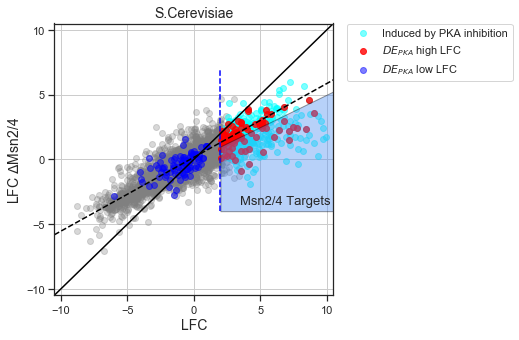

In [33]:
#Same as above but in matplotlib instead of plot.ly for manuscript consistancy: 


fig, ax = plt.subplots(figsize=(5,5))

xmax = 10.5
xmin = -xmax
ymax = xmax
ymin = xmin

#Scatter Plots
# (subset_gene_list, show_label, color, alpha)
subsets = OrderedDict({'Other': (set(pkainh_deseq_merged.index)-target_sets['pkainh_act'], 
                                    False, 'grey',0.3),
                           'Induced by PKA inhibition': ( (target_sets['pkainh_act'] & set(pkainh_deseq_merged.index)), 
                                                         True,'cyan', 0.5),
                           '$DE_{PKA}$ high LFC':((set(ohnologs_goi['sc_genename_high']) & set(pkainh_deseq_merged.index)),
                                                  True,'red',0.8),
                           '$DE_{PKA}$ low LFC': ( (set(ohnologs_goi['sc_genename_low']) & set(pkainh_deseq_merged.index)),
                                                  True, 'blue', 0.5)
                             })


for subset_name, (subset_gene_list, show_label, color, alpha) in subsets.items():
    subset = pkainh_deseq_merged.loc[subset_gene_list,:]
    
    scatter = ax.scatter(subset['log2FoldChange_WT'], 
                         subset['log2FoldChange_M24'],
                         color = color, alpha = alpha)
    
    if show_label: 
        scatter.set_label(subset_name)
    else: 
        scatter.set_label(None)

    
#lines  

pkainh_deseq_merged_rep = pkainh_deseq_merged[pkainh_deseq_merged['log2FoldChange_WT']<0]
slope, intercept, r_value, p_value, std_err = stats.linregress(pkainh_deseq_merged_rep['log2FoldChange_WT'], pkainh_deseq_merged_rep['log2FoldChange_M24'])
print('regression for slope : {0:.2f}, intercept: {1:.2f}, R: {2:.2f}'.format(slope,intercept,r_value))

x2 = max(pkainh_deseq_merged['log2FoldChange_WT'])
x1 = min(pkainh_deseq_merged['log2FoldChange_WT'])

AS_lfc_thresh = 2.0
low_y = -4

#(((x1,y1),(x2,y2)), color, style)
lines = {'LFC threshold' : (((AS_lfc_thresh, low_y), (AS_lfc_thresh,7)),'blue','--'), 
         '1:1' : (((xmin, xmin),(xmax,xmax)),'black','-'), 
         'lin_reg' : (((xmin, xmin*slope + intercept),(xmax,xmax*slope + intercept)),'black','--')
        }


for line_name, (((x1,y1),(x2,y2)), color, style) in lines.items():
    x = np.array([x1,x2])
    y = np.array([y1,y2])
    ax.plot(x,y,style, color=color)

#Plot Msn2/4 target region

thresh_slope = 0.5
#M24_min = min(pkainh_deseq_merged[pkainh_deseq_merged['log2FoldChange_WT']>AS_lfc_thresh]['log2FoldChange_M24'])

patches = []
x=[AS_lfc_thresh, xmax, xmax, AS_lfc_thresh]
y=[low_y,  low_y, thresh_slope*xmax, thresh_slope*AS_lfc_thresh]
xy = zip(x,y)
polygon = Polygon(list(xy), closed=True, edgecolor= 'black', facecolor = "#4d8cf2", alpha=0.4)
patches.append(polygon)

p = PatchCollection(patches,match_original=True)
#p.set_array(np.array(colors))
ax.add_collection(p)
    
ax.text(3.5, -3.5,'Msn2/4 Targets',fontdict={'size':13})
ax.set_xlim([xmin,xmax])
ax.set_yticks([-10,-5,0,5,10])
ax.set_ylim([ymin, ymax])
ax.set_xlabel('LFC',fontdict={'size':14})
ax.set_ylabel('LFC $\Delta$Msn2/4',fontdict={'size':14})
ax.grid(True)
ax.set_title('S.Cerevisiae', fontdict={'size':14})
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig.savefig(os.path.normpath('C:/Users/BMH_work/Google Drive/UCSF/ElSamad_Lab/PKA/Manuscript/Msn24_SC.svg'))




In [12]:
#Save a subset of 
#A) PKA inhibited genes   and
#B) DEpka genes 
#That is below a given threshold reduction of LFC

m24_thresh = 0.5

pkainh_deseq_merged['LFC_m24/wt'] = pkainh_deseq_merged['log2FoldChange_M24']/pkainh_deseq_merged['log2FoldChange_WT']

m24_targets = {}
for subset_name in ['DEpka_high', 'pkainh_act']: 
    subset = plot_subsets[subset_name]
    data_subset = pkainh_deseq_merged.loc[subset,:]
    data_subset_m24 = data_subset[data_subset['LFC_m24/wt']<m24_thresh]
    print(len(data_subset_m24))
    print(len(data_subset))
    m24_targets[subset_name] = set(data_subset_m24.index)
    
fname = data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20190319_m24_depka_targets_Scer.pkl'

with open(fname, 'wb') as file:
    pickle.dump(m24_targets, file)

36
89
245
504


In [9]:
# Makes a number of target M24 deletion sets

#Repression percentage method to get Msn2/4 targets:
#list of thresholds to use for effect of Msn24 deletion on PKA inhibition. 
AS_lfc_thresh = 2.0
msn24_threshs = [0.25,0.5,0.6, 0.75]
AS_pval_thresh = 1.5


#I should filter out genes that have low pvalues
pkainh_deseq_merged_subset = pkainh_deseq_merged.loc[(-np.log10(pkainh_deseq_merged['padj_WT'])>AS_pval_thresh) & (pkainh_deseq_merged['log2FoldChange_WT']>AS_lfc_thresh),:]
pkainh_deseq_merged_subset['M24_induction_fraction'] = pkainh_deseq_merged_subset['log2FoldChange_M24']/pkainh_deseq_merged_subset['log2FoldChange_WT']
#This gives a setting with copy warning, but that's ok - I copied the data into a new dataframe. 

msn24_sets = {}

for msn24_thresh in msn24_threshs:
    msn24_thresh_str = '{:.2f}'.format(msn24_thresh)
    msn24_sets['M_'+msn24_thresh_str.split('.')[1]] = list(pkainh_deseq_merged_subset[pkainh_deseq_merged_subset['M24_induction_fraction']<msn24_thresh].index)
    msn24_sets['NM_'+msn24_thresh_str.split('.')[1]] = list(pkainh_deseq_merged_subset[pkainh_deseq_merged_subset['M24_induction_fraction']>msn24_thresh].index)

    
fname = data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181128_m24_pka_targets_vary_slope_' + spec + '.pkl'

with open(fname, 'wb') as file:
    pickle.dump(msn24_sets, file)


C:\Users\BMH_work\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [5]:
set_to_compare = 'M_75'

intersection = set(m24_nmpp1_act_genes.index) & set(msn24_sets[set_to_compare])
interaction_only = set(m24_nmpp1_act_genes.index) - set(msn24_sets[set_to_compare])
slope_only = set(msn24_sets[set_to_compare]) -set(m24_nmpp1_act_genes.index) 

qc_sets = {'intersection':intersection,
           'interaction_only': interaction_only,
           'slope_only': slope_only
          }

for name, qc_set in qc_sets.items():
    print(name)
    print(len(qc_set))
    print(yeast_esr_exp.SC_common_name_lookup(list(qc_set)))

NameError: name 'm24_nmpp1_act_genes' is not defined

In [48]:
#Check number of items below 50 and 25 in each set

#Calculate amount of Msn2/4 reduction
pkainh_deseq_merged['LFC_m24/wt'] = pkainh_deseq_merged['log2FoldChange_M24']/pkainh_deseq_merged['log2FoldChange_WT']

N_tot = {}
N_m24 = {}
for subset_name in ['pkainh_act','DEpka_high']: 
    subset = plot_subsets[subset_name]
    data_subset = pkainh_deseq_merged.loc[subset,:]


    N_tot[subset_name] = len(data_subset)
    N_m24[subset_name] = {}

    for pct_name, pct in {'25':0.25, '50':0.5}.items():
        N_m24[subset_name][pct_name] = len(data_subset[data_subset['LFC_m24/wt']<pct])


pvals = {}
for pct_name in ['25','50']:
    oddsratio, pval = stats.fisher_exact([[N_m24['DEpka_high'][pct_name], N_m24['pkainh_act'][pct_name]],
                        [N_tot['DEpka_high'], N_tot['pkainh_act']]],
                        alternative = 'two-sided')
    pvals[pct_name] = pval
    print(pct_name)
    print('pkainh_act pct : {:.02f}'.format(N_m24['pkainh_act'][pct_name]/N_tot['pkainh_act']))
    print('DEpka_high pct : {:.02f}'.format(N_m24['DEpka_high'][pct_name]/N_tot['DEpka_high']))

pvals

KeyError: 'LFC_m24/wt'

In [86]:
pkainh_deseq_merged[pkainh_deseq_merged['SC_common_name_WT']=='STI1']
#pkainh_m24del_deseq[pkainh_m24del_deseq['SC_common_name']=='TKL2']

,baseMean_WT,log2FoldChange_WT,lfcSE_WT,stat_WT,pvalue_WT,padj_WT,SC_common_name_WT,baseMean_M24,log2FoldChange_M24,lfcSE_M24,stat_M24,pvalue_M24,padj_M24,SC_common_name_M24
YOR027W,1659.941074,1.677797,0.300976,5.574522,2.482109e-08,1.358777e-07,STI1,629.669769,-0.069992,0.285496,-0.245158,0.806334,0.927056,STI1


### Rlog comparison of msn2/4 data

In [18]:
##Plot rlog AS Msn24 v.s. AS WT

#AS_lfc_thresh = 2.0


#Separate into different groups: 

plot_subsets = {'pkainh_act': target_sets['pkainh_act'], 
                'not pkainh_act': set(rlog_data_mean_var.index)-target_sets['pkainh_act'],
                'DEpka_low': set(ohnologs_goi['sc_genename_low']),
                'DEpka_high': set(ohnologs_goi['sc_genename_high'])}


params =  {'pkainh_act': {'color': 'cyan', 'alpha': 0.8},
           'not pkainh_act': {'color':'grey', 'alpha': 0.3},
           'DEpka_low': {'color':'blue', 'alpha':0.8},
           'DEpka_high': {'color':'red', 'alpha':0.8}
          }
            


data = []


                                 
for subset_name, subset in plot_subsets.items():
    data_subset = rlog_data_mean_var.loc[subset,:]
                                 
    trace = pygo.Scatter(
                x = data_subset['AS_WT_cont_mean'], #-np.log10(deseq_data['padj_pkainh']), #
                y = data_subset['AS_M24_cont_mean'] ,
                text = data_subset['SC_common_name'],
                mode = 'markers',
                marker = {'opacity': params[subset_name]['alpha'],
                          'color' : params[subset_name]['color'],
                          #'colorscale' : 'Jet',
                          #'showscale' : False}  #
                         },
                name = subset_name
                
                )
        
    data.append(trace)

line_coords_dict = {'1:1': [(min(rlog_data_mean_var['AS_WT_cont_mean']),max(rlog_data_mean_var['AS_WT_cont_mean'])),(min(rlog_data_mean_var['AS_WT_cont_mean']),max(rlog_data_mean_var['AS_WT_cont_mean']))]}

#{'LFC threshold': [(AS_lfc_thresh,AS_lfc_thresh),(-1,max(pkainh_deseq_merged['log2FoldChange_M24']))], 
#                     '1:1': [(min(pkainh_deseq_merged['log2FoldChange_WT']),max(pkainh_deseq_merged['log2FoldChange_WT'])),(min(pkainh_deseq_merged['log2FoldChange_WT']),max(pkainh_deseq_merged['log2FoldChange_WT']))]
#                    }

# m24_threshs = {'M25':0.25, 'M50': 0.5, 'M75': 0.75}

# for m24_thresh_name, m24_thresh in m24_threshs.items():
#     x2 = max(pkainh_deseq_merged['log2FoldChange_WT'])
#     line_coords_dict[m24_thresh_name] = [(0,x2),(0,m24_thresh*x2)]

for line_name, line_coords in line_coords_dict.items():

    trace = pygo.Scatter(
        x = np.array(line_coords[0]),
        y = np.array(line_coords[1]),
        mode = 'lines',
        marker = {'color': 'black',
                  'size': 5},
        name = line_name
    )
    
    data.append(trace)


layout = pygo.Layout(
    xaxis= {
        #"range":[-2, 20],
        "title":'rlog WT no drug'
    },
    yaxis= {
        #"range":[-2, 20],
        "title":'rlog M24 no drug'
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename='rlog_wt_v_m24_SC_no_drug')

In [19]:
##Plot rlog AS Msn24 v.s. AS WT

#AS_lfc_thresh = 2.0


#Separate into different groups: 

plot_subsets = {'pkainh_act': target_sets['pkainh_act'], 
                'not pkainh_act': set(rlog_data_mean_var.index)-target_sets['pkainh_act'],
                'DEpka_low': set(ohnologs_goi['sc_genename_low']),
                'DEpka_high': set(ohnologs_goi['sc_genename_high'])}


params =  {'pkainh_act': {'color': 'cyan', 'alpha': 0.8},
           'not pkainh_act': {'color':'grey', 'alpha': 0.3},
           'DEpka_low': {'color':'blue', 'alpha':0.8},
           'DEpka_high': {'color':'red', 'alpha':0.8}
          }
            


data = []


                                 
for subset_name, subset in plot_subsets.items():
    data_subset = rlog_data_mean_var.loc[subset,:]
                                 
    trace = pygo.Scatter(
                x = data_subset['AS_WT_drug_mean'], #-np.log10(deseq_data['padj_pkainh']), #
                y = data_subset['AS_M24_drug_mean'] ,
                text = data_subset['SC_common_name'],
                mode = 'markers',
                marker = {'opacity': params[subset_name]['alpha'],
                          'color' : params[subset_name]['color'],
                          #'colorscale' : 'Jet',
                          #'showscale' : False}  #
                         },
                name = subset_name
                
                )
        
    data.append(trace)

line_coords_dict = {'1:1': [(min(rlog_data_mean_var['AS_WT_drug_mean']),max(rlog_data_mean_var['AS_WT_drug_mean'])),(min(rlog_data_mean_var['AS_WT_drug_mean']),max(rlog_data_mean_var['AS_WT_drug_mean']))]}

#{'LFC threshold': [(AS_lfc_thresh,AS_lfc_thresh),(-1,max(pkainh_deseq_merged['log2FoldChange_M24']))], 
#                     '1:1': [(min(pkainh_deseq_merged['log2FoldChange_WT']),max(pkainh_deseq_merged['log2FoldChange_WT'])),(min(pkainh_deseq_merged['log2FoldChange_WT']),max(pkainh_deseq_merged['log2FoldChange_WT']))]
#                    }

# m24_threshs = {'M25':0.25, 'M50': 0.5, 'M75': 0.75}

# for m24_thresh_name, m24_thresh in m24_threshs.items():
#     x2 = max(pkainh_deseq_merged['log2FoldChange_WT'])
#     line_coords_dict[m24_thresh_name] = [(0,x2),(0,m24_thresh*x2)]

for line_name, line_coords in line_coords_dict.items():

    trace = pygo.Scatter(
        x = np.array(line_coords[0]),
        y = np.array(line_coords[1]),
        mode = 'lines',
        marker = {'color': 'black',
                  'size': 5},
        name = line_name
    )
    
    data.append(trace)


layout = pygo.Layout(
    xaxis= {
        #"range":[-2, 20],
        "title":'rlog WT NMPP1'
    },
    yaxis= {
        #"range":[-2, 20],
        "title":'rlog M24 NMPP1'
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename='rlog_wt_v_m24_SC_NMPP1')

## Venn Diagrams

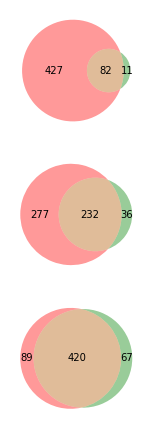

In [115]:
# Venn Diagrams with PKA inhibition

fig, axarr = plt.subplots(3,1, figsize =(20,7.5))

jj = 0

for jj, msn24_set_name in enumerate(['M_25','M_50','M_75']):
    ax = axarr[jj]
    venn2([ set(pkainh_act_genes.index), set(msn24_sets[msn24_set_name])], ax = ax, set_labels = None) # set_labels = [ 'Activated under PKA inhibition', 'Activation requires Msn2/4'])


In [30]:
#To Call Rph1/Gis1 repressed genes make a line from (1.5, 3) to (3.0, 0) and a hard cutoff below of 0.5

x1,y1 = (1.0,7.0)  #(1.0,4.8) #(1.0,4.0)
x2,y2 = (2.5,0.0)  #(1.5, 0.0) #(2.5,0.0)
ymin =  0.4           #0.4

line_coords = [(x1,y1),(x2,y2),ymin]
coords['r1g1_rep'] = line_coords

x = r1g1_deseq['log2FoldChange']
y =  -np.log10(r1g1_deseq['pvalue'])

r1g1_rep_genes = r1g1_deseq[(y > y2- (y2-y1)/(x2-x1)*(x2-x)) & (y>ymin)]

print(len(r1g1_rep_genes))

154


In [118]:
#Plot Deseq LFC v.s. pValue for rph1/gis1 deletion

x_data = r1g1_deseq['log2FoldChange']
y_data = -np.log10(r1g1_deseq['pvalue'])
hover_text = r1g1_deseq['SC_common_name']

fig = expression_plots.lfc_padj_plot_with_lines(x_data,y_data,hover_text,coords['r1g1_rep'])

py.iplot(fig, filename='RNAseq2018_AS_VS_R1G1')

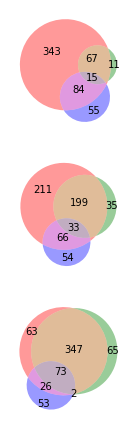

In [119]:
# Venn Diagrams with PKA inhibition

fig, axarr = plt.subplots(3,1, figsize =(20,7.5))

jj = 0

for jj, msn24_set_name in enumerate(['M_25','M_50','M_75']):
    ax = axarr[jj]
    venn3([ set(pkainh_act_genes.index), set(msn24_sets[msn24_set_name]), set(r1g1_rep_genes.index)], ax = ax, set_labels = None) # set_labels = [ 'Activated under PKA inhibition', 'Activation requires Msn2/4'])


In [31]:
#To Call Msn2/4 PKA interaction genes make a line and a hard cutoff for -log10p value 


x1,y1 = (-2.0,0.0) #low thresh (-3.5,0.0) #high thresh    #(-4.0,0.0)
x2,y2 = (-1.5,8.0) #low thresh (-1.8,13.0) #high thresh  #(-2.4,16.5)
ymin = 0.5 #low thresh #1.0 #high thresh #1.0

line_coords = [(x1,y1),(x2,y2),ymin]
coords['m24_nmpp1_int'] = line_coords

x_data = m24_nmpp1_int_deseq['log2FoldChange']
y_data = -np.log10(m24_nmpp1_int_deseq['pvalue'])

m24_nmpp1_act_genes = m24_nmpp1_int_deseq[(y_data > y2- (y2-y1)/(x2-x1)*(x2-x_data)) & (y_data>ymin)]

print(len(m24_nmpp1_act_genes))

299


In [78]:
m24_nmpp1_int_deseq[m24_nmpp1_int_deseq['SC_common_name']=='HSP12']

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,SC_common_name
YFL014W,10792.998045,-2.675336,0.929168,-2.87928,0.003986,0.037592,HSP12


In [59]:
#Plot Msn24/nmpp1 interaction LFC v.s. pValue

line_coords = [(x1,y1),(x2,y2),ymin]

hover_text = m24_nmpp1_int_deseq['SC_common_name']

fig = expression_plots.lfc_padj_plot_with_lines(x_data,y_data,hover_text,line_coords)

py.iplot(fig, filename='RNAseq2018_Msn24_drug_interaction')


In [32]:
#To Call Msn2/4 deletion genes make a line from and a hard cutoff for -log10p value of above 0.5. 
#This was chosen to include CYC7 and HOR7 but not MPC3. 

x1,y1 = (-1.5,0.0)
x2,y2 = (-1.0,3.0)
ymin = 0.3

line_coords = [(x1,y1),(x2,y2),ymin]
coords['m24_act'] = line_coords

x_data = m24_deseq['log2FoldChange']
y_data =  -np.log10(m24_deseq['pvalue'])

m24_act_genes = m24_deseq[(y_data > y2- (y2-y1)/(x2-x1)*(x2-x_data)) & (y_data>ymin)]

print(len(m24_act_genes))


104


In [61]:
#Plot Deseq LFC v.s. pValue

line_coords = [(x1,y1),(x2,y2),ymin]

hover_text = m24_deseq['SC_common_name']

fig = expression_plots.lfc_padj_plot_with_lines(x_data,y_data,hover_text,line_coords)

py.iplot(fig, filename='RNAseq2018_WT_VS_M24')


In [95]:
r1g1_deseq[r1g1_deseq['SC_common_name']=='CYC7']

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,SC_common_name
YEL039C,17.431676,2.214395,0.645173,3.432249,0.000599,0.025476,CYC7


In [96]:
#Project Msn2/4 dependent genes onto PKA inhibition genes


#Compare PKA inhibition LFC to r1g1 activation

other_deseq= m24_nmpp1_int_deseq
other_name = 'm24_nmpp1'

#deseq_data = pkainh_deseq.merge(m24_nmpp1_int_deseq,how='left',left_index = True, right_index=True, suffixes=('_pkainh', '_m24_nmpp1'))
deseq_data = pkainh_deseq.merge(other_deseq,how='left',left_index = True, right_index=True, suffixes=('_pkainh', '_' + other_name))

hover_text = []
for ind, row in deseq_data.iterrows():
    hover_text.append(('{SC_common_name}<br>padj 1NMPP1: {pkainh_padj:.2f}<br>padj ' + other_name +' : {other_padj:.2f}').format(
                              SC_common_name=row['SC_common_name_pkainh'],
                              pkainh_padj = -np.log10(row['padj_pkainh']),
                              other_padj = -np.log10(row['padj_' + other_name])
                              ))


data = []

trace = pygo.Scatter(
            x = deseq_data['log2FoldChange_pkainh'], #-np.log10(deseq_data['padj_pkainh']), #
            y = deseq_data['log2FoldChange_'+other_name], #-np.log10(deseq_data['padj_r1g1']),  #
            text = hover_text,
            mode = 'markers',
            marker = {'opacity': 0.5,
              'color' : np.log10(deseq_data['padj_' + other_name]),
              'colorscale' : 'Jet',
              'showscale' : False}  #, 
                      #'color': 'rgba'+str(cmap(NN/10))}, 
            #name = 'WT VS Rph1/Gis1 del'
        )
        
data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-2, 20],
        "title":'LFC AS + 1NMPP1'
    },
    yaxis= {
        #"range":[-2, 20],
        "title":'LFC ' + other_name
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename='RNAseq2018_SC_AS_nmpp1_'+other_name)


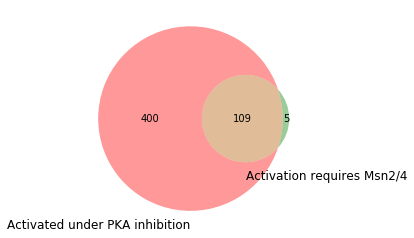

In [62]:
venn2([ set(pkainh_act_genes.index), set(m24_nmpp1_act_genes.index)], set_labels = [ 'Activated under PKA inhibition', 'Activation requires Msn2/4'])

In [100]:
#Compare PKA inhibition LFC to r1g1 activation

other_deseq= r1g1_deseq
other_name = 'r1g1'

#deseq_data = pkainh_deseq.merge(m24_nmpp1_int_deseq,how='left',left_index = True, right_index=True, suffixes=('_pkainh', '_m24_nmpp1'))
deseq_data = pkainh_deseq.merge(other_deseq,how='left',left_index = True, right_index=True, suffixes=('_pkainh', '_' + other_name))

hover_text = []
for ind, row in deseq_data.iterrows():
    hover_text.append(('{SC_common_name}<br>padj 1NMPP1: {pkainh_padj:.2f}<br>padj ' + other_name +' : {other_padj:.2f}').format(
                              SC_common_name=row['SC_common_name_pkainh'],
                              pkainh_padj = -np.log10(row['padj_pkainh']),
                              other_padj = -np.log10(row['padj_' + other_name])
                              ))


data = []

trace = pygo.Scatter(
            x = deseq_data['log2FoldChange_pkainh'], #-np.log10(deseq_data['padj_pkainh']), #
            y = deseq_data['log2FoldChange_'+other_name], #-np.log10(deseq_data['padj_r1g1']),  #
            text = hover_text,
            mode = 'markers',
            marker = {'opacity': 0.5,
              'color' : np.log10(deseq_data['padj_' + other_name]),
              'colorscale' : 'Jet',
              'showscale' : False}  #, 
                      #'color': 'rgba'+str(cmap(NN/10))}, 
            #name = 'WT VS Rph1/Gis1 del'
        )
        
data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-2, 20],
        "title":'LFC AS + 1NMPP1'
    },
    yaxis= {
        #"range":[-2, 20],
        "title":'LFC ' + other_name
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename='RNAseq2018_SC_AS_nmpp1_'+other_name)


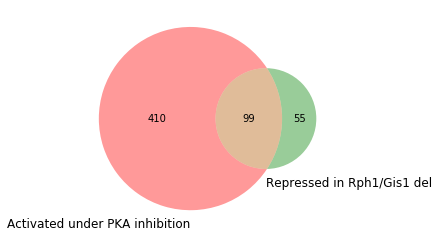

In [63]:
venn2([ set(pkainh_act_genes.index), set(r1g1_rep_genes.index)], set_labels = [ 'Activated under PKA inhibition', 'Repressed in Rph1/Gis1 del'])

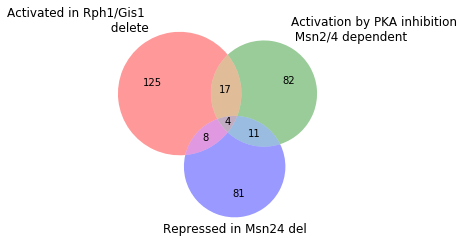

In [64]:
venn3([set(r1g1_rep_genes.index), set(m24_nmpp1_act_genes.index), set(m24_act_genes.index)], set_labels = ['Activated in Rph1/Gis1 \n delete', 'Activation by PKA inhibition \n Msn2/4 dependent', 'Repressed in Msn24 del'])

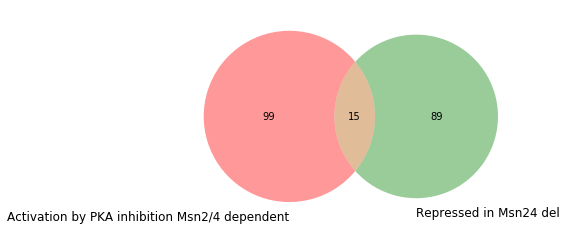

In [65]:
venn2([ set(m24_nmpp1_act_genes.index), set(m24_act_genes.index)], set_labels = [ 'Activation by PKA inhibition Msn2/4 dependent', 'Repressed in Msn24 del'])

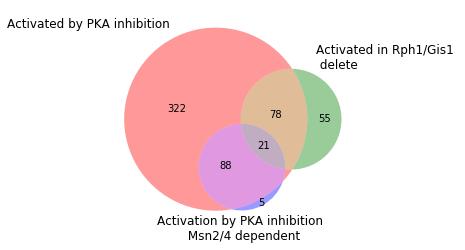

In [66]:
venn3([set(pkainh_act_genes.index),set(r1g1_rep_genes.index), set(m24_nmpp1_act_genes.index)], set_labels = ['Activated by PKA inhibition','Activated in Rph1/Gis1 \n delete', 'Activation by PKA inhibition \n Msn2/4 dependent'])
#venn3([set(m24_act_genes.index), set(m24_nmpp1_act_genes.index), set(pkainh_act_genes.index)], set_labels = ['Activated in Rph1/Gis1 \n delete (exp growth)', 'Activation by PKA inhibition \n Msn2/4 dependent', 'Activated by PKA inhibition'])

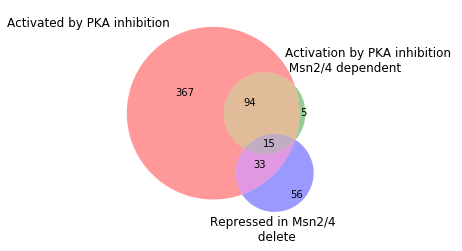

In [67]:
venn3([set(pkainh_act_genes.index), set(m24_nmpp1_act_genes.index),set(m24_act_genes.index) ], set_labels = ['Activated by PKA inhibition', 'Activation by PKA inhibition \n Msn2/4 dependent','Repressed in Msn2/4 \n delete'])

## Saving lists of genes based on experimental cutoffs

In [35]:
#Print out the gene sets and put them into a dictionary - save the dictionary as a .pkl
#Repressed in Msn2/4 Delete basally

spec = 'SC'

msn2_level = 'M_75'

target_sets = {'m24_nmpp1_act': set(msn24_sets[msn2_level]), #set(m24_nmpp1_act_genes.index),
               'r1g1_rep': set(r1g1_rep_genes.index),
               'm24_act': set(m24_act_genes.index), 
               'pkainh_act' : set(pkainh_act_genes.index),
               'pkainh_rep' : set(pkainh_rep_genes.index)}

fname = data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181203_r1g1_m24_pka_targets_' + spec + '.pkl'

with open(fname, 'wb') as file:
    pickle.dump([target_sets, coords], file)


In [69]:
coords

{'pkainh_act': [(2.0, 15), (2.5, 0.0), 1.5],
 'r1g1_rep': [(1.0, 7.0), (2.5, 0.0), 0.4],
 'm24_nmpp1_int': [(-3.5, 0.0), (-1.8, 13.0), 1.0],
 'm24_act': [(-1.5, 0.0), (-1.0, 3.0), 0.3]}

In [133]:
#quickly print out names of target genes

print('Full Sets: \n')
for name, gene_set in target_sets.items():
    print(name + ', N_genes = ' + str(len(gene_set)) + ':')
    print(', '.join(list(yeast_esr_exp.SC_common_name_lookup(gene_set))))
    print('\n')

print('Intersections: \n')

gene_set = target_sets['m24_nmpp1_act']-target_sets['r1g1_rep']
print('m24_nmpp1_only, N_genes = ' + str(len(gene_set)) + ':')
print(', '.join(list(yeast_esr_exp.SC_common_name_lookup(gene_set))) + '\n')


gene_set = target_sets['r1g1_rep']-target_sets['m24_nmpp1_act']
print('r1g1_rep_only, N_genes = ' + str(len(gene_set)) + ':')
print(', '.join(list(yeast_esr_exp.SC_common_name_lookup(gene_set)))+ '\n')


gene_set = target_sets['r1g1_rep'] & target_sets['m24_nmpp1_act']
print('r1g1_rep_and_m24_nmpp1_act, N_genes = ' + str(len(gene_set)) + ':')
print(', '.join(list(yeast_esr_exp.SC_common_name_lookup(gene_set)))+ '\n')




Full Sets: 

m24_nmpp1_act, N_genes = 487:
NDI1, DDP1, YDR018C, YAP6, NTH1, ASG7, YGR018C, YML131W, YMR196W, LSO1, EDS1, RFS1, MCP1, AIM19, CAT2, HSP31, GAC1, DAN4, YBR056W, GRE2, FMP33, STL1, SPS19, YLR345W, MIX14, YHR097C, AIM41, ALD2, MHP1, RGI1, SGA1, DSC3, APE3, SNF3, YFL041W-A, TSL1, GDH3, XKS1, TPS1, COQ6, YDR034W-B, CRG1, YPI1, APC9, HUL4, SIP4, COQ3, YDR381C-A, SDH5, GPM2, YBR284W, NQM1, YJL070C, PEX18, YLR118C, POT1, PPE1, GPH1, EGH1, ATG4, YET2, YOR019W, CMC4, UBC8, ADP1, CUZ1, NGL3, POM33, SCS22, HSP26, FRE2, YDL206W, GIP2, YOR186W, AAC1, MAM3, YER068C-A, PRY1, YHR007C-A, ATG36, CAT8, YPR098C, YPR172W, YER084W-A, ECI1, ADY3, BDH1, COX26, CMG1, PKP2, FRT2, STR3, GTT1, GRX1, YDL057W, YDL062W, COQ11, AVT6, YKL107W, RNR3, VPS65, SPG4, YLR173W, TMC1, CAT5, PIC2, IRC18, UBX3, CMK1, PEP4, YAP1801, SPO1, MPC54, ZWF1, GDB1, GUT2, POR1, NUR1, BOP2, YGR053C, VHS1, SSA4, YDR406W-A, YBL039W-B, SDS24, YJL144W, YCP4, ATG7, TDA10, SIP2, YHR193C-A, TPS2, DIA3, PUT1, URA10, YPR127W, UGA2, AT

YLR030W, UBC8, REC114, ATG33, TSL1, RRT8, GSM1, XBP1, HSP26, TMC1, YNR014W, XKS1, YLR311C, RDL1, NTH1, YHR140W, XYL2, CTT1, YPT53, GAD1, ZWF1, IGD1, YLR031W, IRC24, MAM3, YBR241C, AMS1, PEX30, HYR1, SSE2, SIP4, MAG1, ATG39, SOD2, GLG2, SDP1, HES1, YHL044W, GPM2, YIR014W, YBR284W, FMP48, PHM7, TRX3, CYC7, RNY1, YJL070C, YER084W-A, SHC1, PCH2, YGR053C, GAC1, YBR056W, COX26, RTC3, HEF3, SDS24, YLR345W, LEE1, STR3, GTT1, EGO4, NDE2, ATG7, MXR2, YET2, UGX2, DBP1, YDR491C, GPD1, DCS2, ATG1, DSF1, RGI1, SGA1



In [22]:
#Plot LFC of RG activation v.s. M24 drug interaction

r1g1_m24int_merge = r1g1_deseq.merge(m24_nmpp1_int_deseq, how='inner',suffixes= ('_RGrep','_M24act'),left_index=True, right_index=True)


data = []

trace = pygo.Scatter(
            x = r1g1_m24int_merge['log2FoldChange_RGrep'], 
            y =  r1g1_m24int_merge['log2FoldChange_M24act'],
            text = r1g1_m24int_merge['SC_common_name_RGrep'],
            mode = 'markers',
            marker = {'opacity': 0.5}, #, 
                      #'color': 'rgba'+str(cmap(NN/10))}, 
            name = 'Rph1/Gis1 repressed LFC vs Msn24_PKA activation LFC'
        )
        
data.append(trace)

layout = pygo.Layout(
    xaxis= {
        "range":[-20, 20],
        "title":'Rph1/Gis1 del v.s. WT LFC'
    },
    yaxis= {
        "range":[-10, 10],
        "title":'Msn24 del/PKA inhibition interaction term LFC'
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename='RNAseq2018_R1G1rep_v_M24PKAact')

In [23]:
r1g1_m24int_merge[r1g1_m24int_merge['SC_common_name_M24act']=='HSP12']

,baseMean_RGrep,log2FoldChange_RGrep,lfcSE_RGrep,stat_RGrep,pvalue_RGrep,padj_RGrep,SC_common_name_RGrep,baseMean_M24act,log2FoldChange_M24act,lfcSE_M24act,stat_M24act,pvalue_M24act,padj_M24act,SC_common_name_M24act
YFL014W,48.704855,-0.821724,0.575935,-1.426765,0.153648,0.99735,HSP12,4586.58369,-3.874665,1.27219,-3.045665,0.002322,0.031496,HSP12


## Promoter analysis of various groups

In [7]:
#Read in the SC promoter database.  
sc_promoters = pd.read_pickle(data_processing_dir + os.path.normpath("sc_promoters/sc_promoters.pkl"))

In [15]:
#Make promoter files for different sets

genesets = {'r1g1_rep': r1g1_rep_genes.index, 'm24_act': m24_act_genes.index, 'm24_nmpp1_act': m24_nmpp1_act_genes.index}

for name, geneset in genesets.items(): 
    target_promoter_fname = data_processing_dir + os.path.normpath('sc_promoters/promoter_sets/sc_20181101_' + name + '.fasta')
    yeast_esr_exp.write_promoter_file(sc_promoters, geneset,target_promoter_fname)

tD(GUC)I1 not in promoter data set.
tE(UUC)K not in promoter data set.
tT(AGU)O2 not in promoter data set.
tV(AAC)M3 not in promoter data set.
tS(AGA)D2 not in promoter data set.


## Looking at rLog data


In [2]:
#See what AS+ in RG and no deletion backgrounds looks like
#should also do this with DEseq

#20181017_metadata_V2_postseq
rlog_all = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_rlog_all_SC.csv'), index_col=0)
metadata_SC = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_metadata_deseq_SC.csv'), index_col=0)
#metadata_SC_orig = metadata_SC = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_metadata_deseq_SC_orig.csv'), index_col=0)


Text(0.5,0.98,'RGM24_cont')

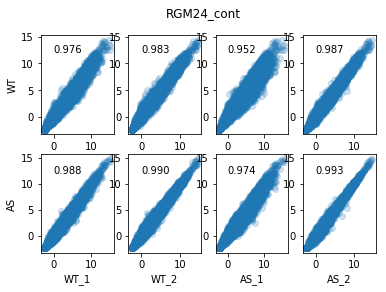

In [143]:
#Look at scatter of rlog for replicate 3 vs 2 and 1

#for nmpp1 in ['cont', 'drug']:
#for tf_del in ['WT','RG','M24','RGM24']

nmpp1 = 'cont'
tf_del = 'RGM24'


fig, axarr = plt.subplots(2,4)

y1_ind = metadata_SC_orig[(metadata_SC_orig['NMPP1']==nmpp1) & 
                          (metadata_SC_orig['tf_del'] == tf_del) &
                          (metadata_SC_orig['replicate']=='3') &
                          (metadata_SC_orig['pka_AS_mut']=='WT')
                         ]
y1 = rlog_all.loc[:,str(y1_ind.index[0])]


y2_ind = metadata_SC_orig[(metadata_SC_orig['NMPP1']==nmpp1) & 
                          (metadata_SC_orig['tf_del'] == tf_del) &
                          (metadata_SC_orig['replicate']=='3') &
                          (metadata_SC_orig['pka_AS_mut']=='AS')
                         ]
y2 = rlog_all.loc[:,str(y2_ind.index[0])]

jj = 0
for pka_as_mut in ['WT','AS']:
    for replicate in ['1','2']:
        x_ind = metadata_SC_orig[(metadata_SC_orig['NMPP1']==nmpp1) & 
                          (metadata_SC_orig['tf_del'] == tf_del) &
                          (metadata_SC_orig['replicate']==replicate) &
                          (metadata_SC_orig['pka_AS_mut']==pka_as_mut)
                         ]
        x = rlog_all.loc[:,str(x_ind.index[0])]
        
        ax = axarr[0,jj]
        ax.scatter(x,y1,alpha = 0.2)
        if jj==0:
            ax.set_ylabel('WT')
        ax.text(0,12,'{:0.3f}'.format(np.corrcoef(x,y1)[0,1]))
        
        ax = axarr[1,jj]
        if jj==0:
            ax.set_ylabel('AS')
        ax.scatter(x,y2,alpha = 0.2)
        
        ax.text(0,12,'{:0.3f}'.format(np.corrcoef(x,y2)[0,1]))
        
        ax.set_xlabel(pka_as_mut + '_' + replicate)
        
        jj = jj + 1
        
fig.suptitle(tf_del + '_' + nmpp1)


In [88]:
#Load mean rlog data
rlog_data_mean_var = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_rlog_mean_SC.csv' ),index_col=0)



In [90]:
rlog_data_mean_var.columns

Index(['AS_M24_cont_mean', 'AS_M24_drug_mean', 'AS_RGM24_cont_mean',
       'AS_RGM24_drug_mean', 'AS_RG_cont_mean', 'AS_RG_drug_mean',
       'AS_WT_cont_mean', 'AS_WT_drug_mean', 'WT_M24_cont_mean',
       'WT_M24_drug_mean', 'WT_RGM24_cont_mean', 'WT_RGM24_drug_mean',
       'WT_RG_cont_mean', 'WT_RG_drug_mean', 'WT_WT_cont_mean',
       'WT_WT_drug_mean', 'AS_M24_cont_var', 'AS_M24_drug_var',
       'AS_RGM24_cont_var', 'AS_RGM24_drug_var', 'AS_RG_cont_var',
       'AS_RG_drug_var', 'AS_WT_cont_var', 'AS_WT_drug_var', 'WT_M24_cont_var',
       'WT_M24_drug_var', 'WT_RGM24_cont_var', 'WT_RGM24_drug_var',
       'WT_RG_cont_var', 'WT_RG_drug_var', 'WT_WT_cont_var', 'WT_WT_drug_var',
       'SC_common_name'],
      dtype='object')

In [92]:
spec = 'SC'

data = []

xlabel = 'AS_WT_drug_mean'
ylabel = 'AS_RG_drug_mean'

trace = pygo.Scatter(
            x = rlog_data_mean_var[xlabel], 
            y =  rlog_data_mean_var[ylabel],
            text = rlog_data_mean_var['SC_common_name'],
            mode = 'markers',
            marker = {'opacity': 0.5}, #, 
                      #'color': 'rgba'+str(cmap(NN/10))}, 
            name = xlabel + ' vs ' + ylabel 
        )
        
data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-20, 20],
        "title": 'mean rlog ' + xlabel
    },
    yaxis= {
        #"range":[-10, 10],
        "title": 'mean rlog ' + ylabel
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename= xlabel + '_vs_' + ylabel + '_' + spec + '_mean_rlog')

In [93]:
spec = 'SC'

data = []

xlabel = 'AS_WT_cont_mean'
ylabel = 'AS_RG_cont_mean'

trace = pygo.Scatter(
            x = rlog_data_mean_var[xlabel], 
            y =  rlog_data_mean_var[ylabel],
            text = rlog_data_mean_var['SC_common_name'],
            mode = 'markers',
            marker = {'opacity': 0.5}, #, 
                      #'color': 'rgba'+str(cmap(NN/10))}, 
            name = xlabel + ' vs ' + ylabel 
        )
        
data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-20, 20],
        "title": 'mean rlog ' + xlabel
    },
    yaxis= {
        #"range":[-10, 10],
        "title": 'mean rlog ' + ylabel
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename= xlabel + '_vs_' + ylabel + '_' + spec + '_mean_rlog')

In [94]:
spec = 'SC'

data = []

xlabel = 'WT_WT_cont_mean'
ylabel = 'WT_RG_cont_mean'

trace = pygo.Scatter(
            x = rlog_data_mean_var[xlabel], 
            y =  rlog_data_mean_var[ylabel],
            text = rlog_data_mean_var['SC_common_name'],
            mode = 'markers',
            marker = {'opacity': 0.5}, #, 
                      #'color': 'rgba'+str(cmap(NN/10))}, 
            name = xlabel + ' vs ' + ylabel 
        )
        
data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-20, 20],
        "title": 'mean rlog ' + xlabel
    },
    yaxis= {
        #"range":[-10, 10],
        "title": 'mean rlog ' + ylabel
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename= xlabel + '_vs_' + ylabel + '_' + spec + '_mean_rlog')

In [95]:
spec = 'SC'

data = []

xlabel = 'WT_WT_cont_mean'
ylabel = 'AS_WT_cont_mean'

trace = pygo.Scatter(
            x = rlog_data_mean_var[xlabel], 
            y =  rlog_data_mean_var[ylabel],
            text = rlog_data_mean_var['SC_common_name'],
            mode = 'markers',
            marker = {'opacity': 0.5}, #, 
                      #'color': 'rgba'+str(cmap(NN/10))}, 
            name = xlabel + ' vs ' + ylabel 
        )
        
data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-20, 20],
        "title": 'mean rlog ' + xlabel
    },
    yaxis= {
        #"range":[-10, 10],
        "title": 'mean rlog ' + ylabel
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename= xlabel + '_vs_' + ylabel + '_' + spec + '_mean_rlog')

In [27]:
?pd.MultiIndex
#metadata_SC['pka_AS_mut'] + '_' + metadata_SC['tf_del'] + '_' + metadata_SC['NMPP1'] 

## Look at Msn24 and Rph1/Gis1 genes projected onto only orthologs

In [12]:
#Load Ortholog data

ohnologs = pd.read_csv(data_processing_dir + os.path.normpath("ortholog_files_YGOB/ohnologs.csv"), index_col=0)
print('Total number of Ohnologs: ' + str(len(ohnologs)))


Total number of Ohnologs: 547


In [4]:
#Make rlog average for AS -NMPP1 and AS +NMPP1

#Load DEseq data for SCer PKA AS -/+ NMPP1 
pkainh_deseq = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_deseq_SC_AS_WT_nmpp1.csv'), index_col=0)
pkainh_deseq['SC_common_name'] = yeast_esr_exp.SC_common_name_lookup(pkainh_deseq.index)



In [14]:
#build a dataframe that has all SC paralogs paired up with another dataframe (in this case LFC and padj for PKA inhibition

data_to_add = pkainh_deseq.loc[:,['log2FoldChange','padj']]
sort_column = 'log2FoldChange'

ohnologs_expression_sorted = yeast_esr_exp.join_ohnologs_and_sort(data_to_add, ohnologs, sort_column)


In [121]:
msn24_sets['M_75']

['YGR088W',
 'YFL014W',
 'YMR174C',
 'YML128C',
 'YOR173W',
 'YBR072W',
 'YDR453C',
 'YMR175W',
 'YPR160W',
 'YMR169C',
 'YPL186C',
 'YGR256W',
 'YNR034W-A',
 'YBR116C',
 'YER103W',
 'YMR196W',
 'YGR248W',
 'YOR120W',
 'YER054C',
 'YIL136W',
 'YOL052C-A',
 'YGR008C',
 'YGR201C',
 'YMR250W',
 'YKL151C',
 'YNL195C',
 'YHR087W',
 'YMR090W',
 'YDR070C',
 'YJL161W',
 'YNL274C',
 'YDL085W',
 'YBR169C',
 'YIL155C',
 'YIL160C',
 'YHR139C',
 'YDR533C',
 'YBR230C',
 'YDL169C',
 'YNL200C',
 'YDL204W',
 'YGR281W',
 'YEL011W',
 'YLR258W',
 'YIL113W',
 'YBL064C',
 'YDR034W-B',
 'YNL160W',
 'YMR271C',
 'YML054C',
 'YBL078C',
 'YKL065W-A',
 'YLR164W',
 'YJR096W',
 'YMR118C',
 'YDL223C',
 'YHR097C',
 'YMR105C',
 'YOR374W',
 'YLR356W',
 'YHR140W',
 'YKL091C',
 'YKL163W',
 'YKR076W',
 'YPL123C',
 'YIR038C',
 'YFR017C',
 'YML100W',
 'YPL004C',
 'YER150W',
 'YAL061W',
 'YCL035C',
 'YBR147W',
 'YKL026C',
 'YJR155W',
 'YDR231C',
 'YBR241C',
 'YGR174C',
 'YNL202W',
 'YOR215C',
 'YOR228C',
 'YAL017W',
 'YBR214

In [129]:
#Loop through High ortholog and low ortholog
#Plot each of the groups of data 

msn2_level = 'M_75'

x1,y1 = (2.0,15)
x2,y2 = (2.5,0.0)
ymin = 1.5

symbols = {'low':'square-open', 'high':'circle'}

groups = {'r1g1_act_only' : set(r1g1_rep_genes.index) - set(msn24_sets[msn2_level]), 
          'm24_nmpp1_only' : set(msn24_sets[msn2_level]) - set(r1g1_rep_genes.index) ,
          'r1g1_act_and_m24_nmpp1' : (set(msn24_sets[msn2_level]) & set(r1g1_rep_genes.index)),
          'others' : ((set(ohnologs_expression_sorted['sc_genename_high']) | set(ohnologs_expression_sorted['sc_genename_low'])) -  ((set(msn24_sets[msn2_level]) | set(r1g1_rep_genes.index))))
         }

colors = {'r1g1_act_only' : 'blue', 
          'm24_nmpp1_only' : 'red',
          'r1g1_act_and_m24_nmpp1' : 'green',
          'others' : 'grey'
         }


data = []

hover_text = ('low Paralog: ' + ohnologs_expression_sorted['SC_common_name_low'] + 
              '<br>high Paralog: ' + ohnologs_expression_sorted['SC_common_name_high'] + 
              '<br>low Paralog LFC: ' + ["{:.3}".format(val) for val in ohnologs_expression_sorted['log2FoldChange_low']] +
              '<br>high Paralog LFC: ' + ["{:.3}".format(val) for val in ohnologs_expression_sorted['log2FoldChange_high']]
             )


ohnologs_expression_sorted['hover_text'] = hover_text
              
for level in ['low', 'high']:
    
    # other_deseq= r1g1_deseq
    # other_name = 'r1g1'

    # #deseq_data = pkainh_deseq.merge(m24_nmpp1_int_deseq,how='left',left_index = True, right_index=True, suffixes=('_pkainh', '_m24_nmpp1'))
    # deseq_data = pkainh_deseq.merge(other_deseq,how='left',left_index = True, right_index=True, suffixes=('_pkainh', '_' + other_name))

    # hover_text = []
    # for ind, row in deseq_data.iterrows():
    #     hover_text.append(('{SC_common_name}<br>padj 1NMPP1: {pkainh_padj:.2f}<br>padj ' + other_name +' : {other_padj:.2f}').format(
    #                               SC_common_name=row['SC_common_name_pkainh'],
    #                               pkainh_padj = -np.log10(row['padj_pkainh']),
    #                               other_padj = -np.log10(row['padj_' + other_name])
    #                               ))
    
    for group_name,group in groups.items():
        
        opacity = 0.8
        if group_name == 'others':
            opacity =0.3
        
        data_subset = ohnologs_expression_sorted[ohnologs_expression_sorted['sc_genename_' + level].isin(group)]
        
        hover_text = data_subset['hover_text']
        
        trace = pygo.Scatter(
                    x = data_subset['log2FoldChange_' + level], 
                    y =  -np.log10(data_subset['padj_' + level]),
                    text = hover_text,
                    mode = 'markers',
                    marker = {'opacity': opacity, 
                              'symbol': symbols[level],
                              'color' : colors[group_name]
                             }, 
                    #'color': 'rgba'+str(cmap(NN/10))}, 
                    name = group_name + ' ' + level
                )
        
        data.append(trace)

x = np.array([x1,x2])

trace2 = pygo.Scatter(
    x = x,
    y = y2- (y2-y1)/(x2-x1)*(x2-x),
    mode = 'lines',
    marker = {'color': 'black',
              'size': 5},
    name = 'LFC/padj threshold'
)

data.append(trace2)

if y2-y1<0: #Line has negative slope - looking at right side of axis
    x_at_ymin1 = x1
    x_at_ymin2 = max(x_data)

elif y2-y1 >0:   #Line has positive slope - looking at left side of axis
    x_at_ymin1 = x2
    x_at_ymin2 = min(x_data)

x = np.array([x_at_ymin1, x_at_ymin2])
y = np.array([ymin, ymin])

trace3 = pygo.Scatter(
    x = x,
    y = y,
    mode = 'lines',
    marker = {'color': 'black',
              'size': 5},
    name = 'pvalue threshold'
)


data.append(trace3)

layout = pygo.Layout(
    xaxis= {
        #"range":[-2, 20],
        "title":'LFC'
    },
    yaxis= {
        #"range":[-2, 20],
        "title":'-log10(padj)'
    }
)


fig = pygo.Figure(data=data, layout = layout) 

py.iplot(fig, filename= 'SC_PKA_inh_paralogs_r1g1_' +msn2_level)

## Comparing pre to post UTR data

In [ ]:
#compare raw counts (logged with pseudocount) (as -drug, as +drug)

#load raw counts 





In [ ]:
#compare rlog data

# GOI plot effect of deletions 
